<a href="https://colab.research.google.com/github/suhaibkq/DeepLearning-MachineFailurePrediction/blob/main/INN_ReneWind_Main_Project_LowCode_Notebook_GH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
#Imports metrics from
from sklearn import metrics

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [ ]:
# from google.colab import drive
from google.colab import drive
# drive.mount('/content/drive')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M4 Neural Networks ReneWind Proj/Train.csv')    # Code to import the training data
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M4 Neural Networks ReneWind Proj/Test.csv')    # Code to import the test data

# **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

## Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
df.shape # Code to print the shape of the train data

(20000, 41)

In [ ]:
# Checking the number of rows and columns in the test data
df_test.shape # Code to print the shape of the test data

(5000, 41)

In [ ]:
# Create a copy of the training data
data = df.copy()

In [ ]:
# Create a copy of the testing  data
data_test = df_test.copy()

## Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head(5) # Complete the code to view the first five rows of the train data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
#viewing first 5 rows of the test data
data_test.head(5) # Complete the code to view the first five rows of the test data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


## Checking the data types of the columns in the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info() # Code to view the data types of the columns in the train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- Converting Target column to float

In [ ]:
data['Target'] = data['Target'].astype(float)

Now checking for test data

In [ ]:
data_test.info() # Complete the code to view the data types of the columns in the test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

Converting Target to float

In [ ]:
data_test['Target'] = data_test['Target'].astype(float)

## Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum() # Complete the code to check for duplicate values in the train data

np.int64(0)

## Checking for missing values

In [ ]:
# let's check for missing values in the training data
data.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
# let's check for missing values in the test data
data_test.isnull().sum()

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


## Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe(include="all") # Code to view the statistical summary of the train data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


# **Exploratory Data Analysis**

## Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data= data, x= feature, ax= ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Variables V1 to V29

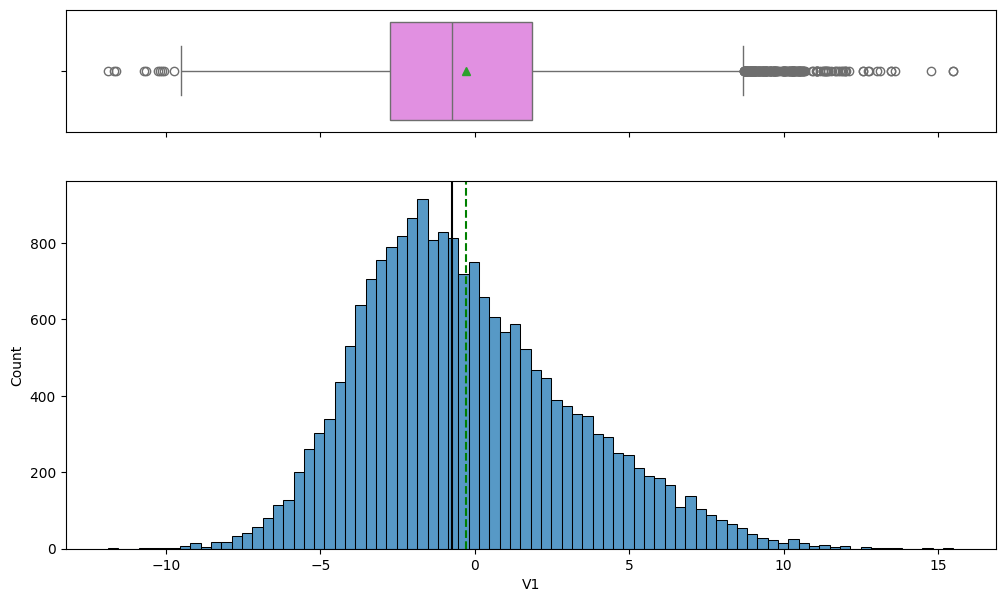

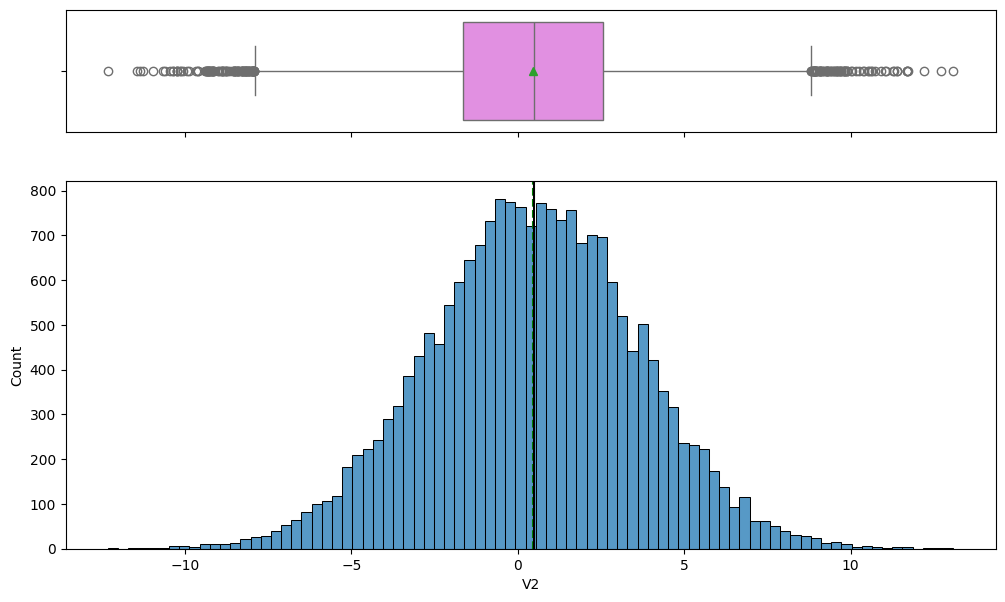

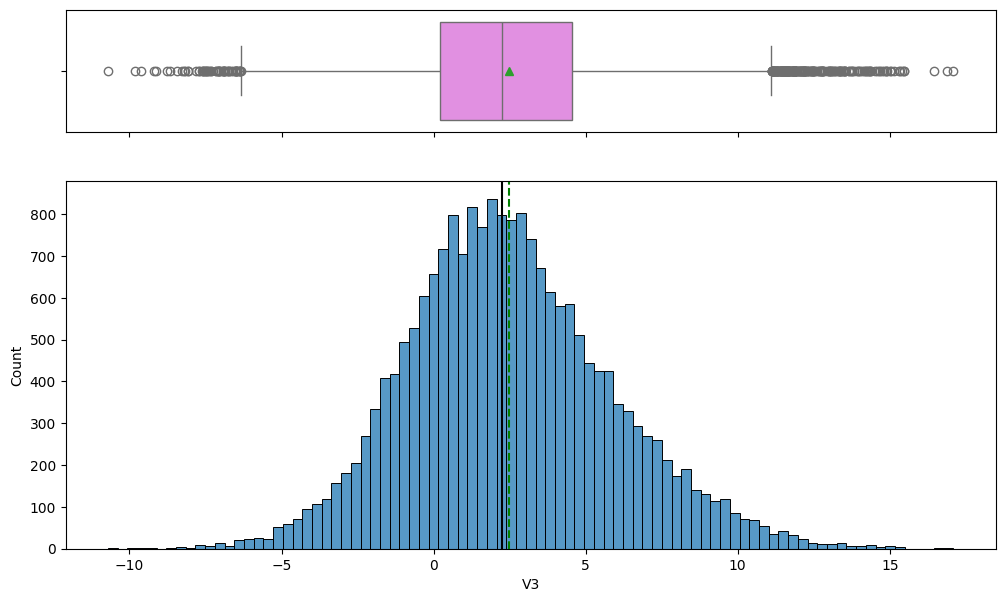

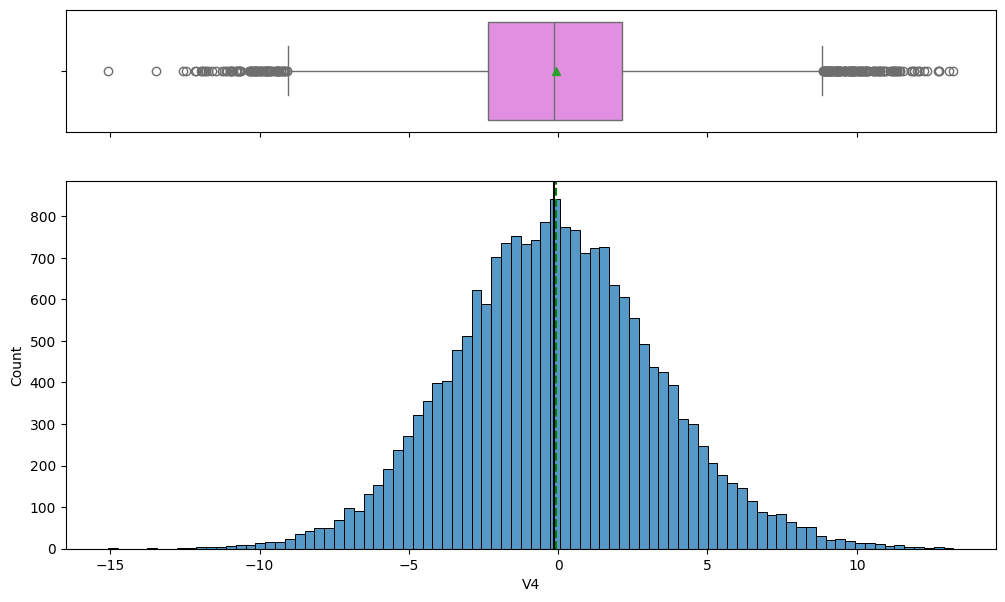

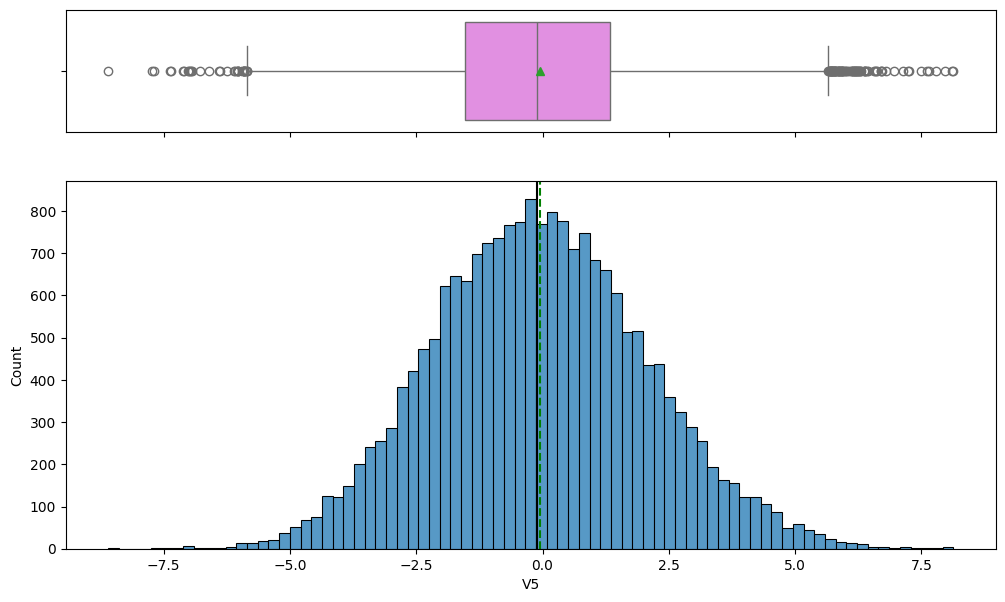

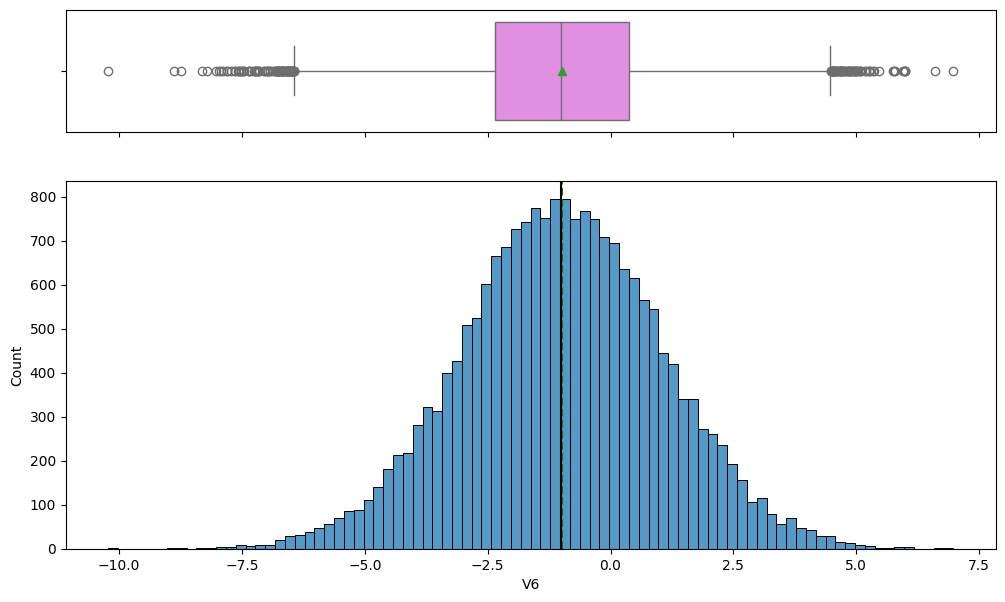

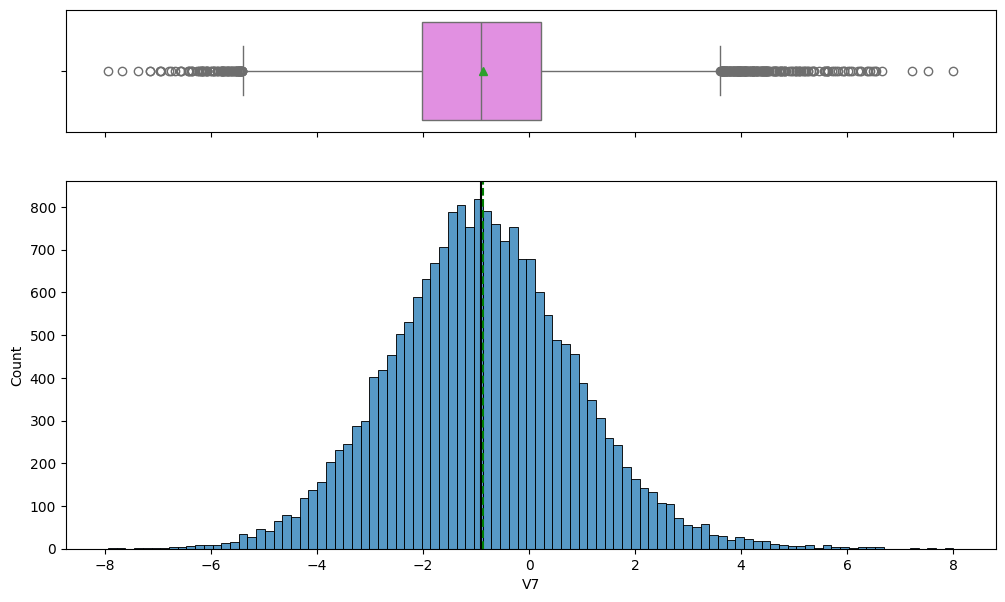

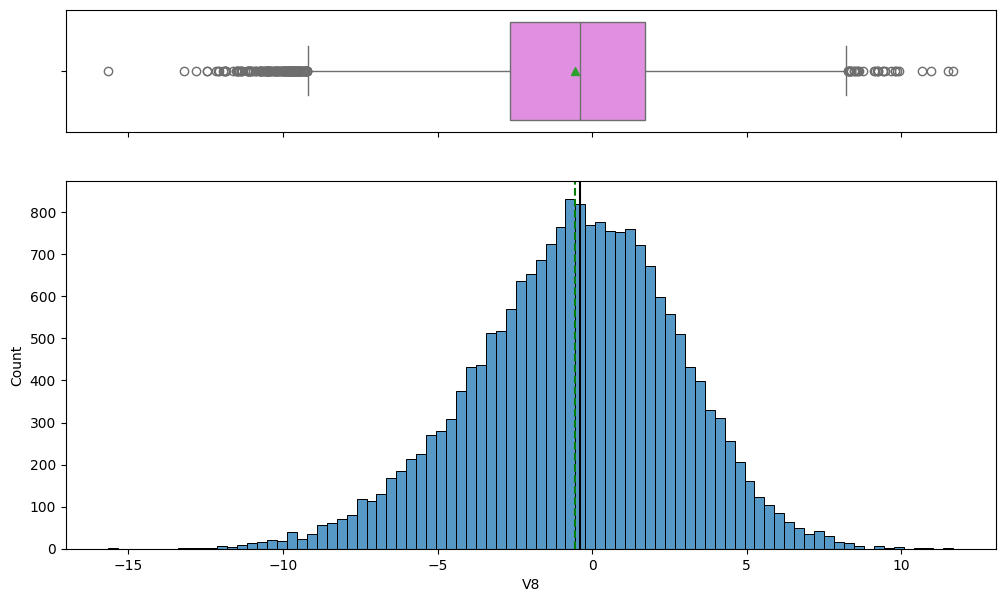

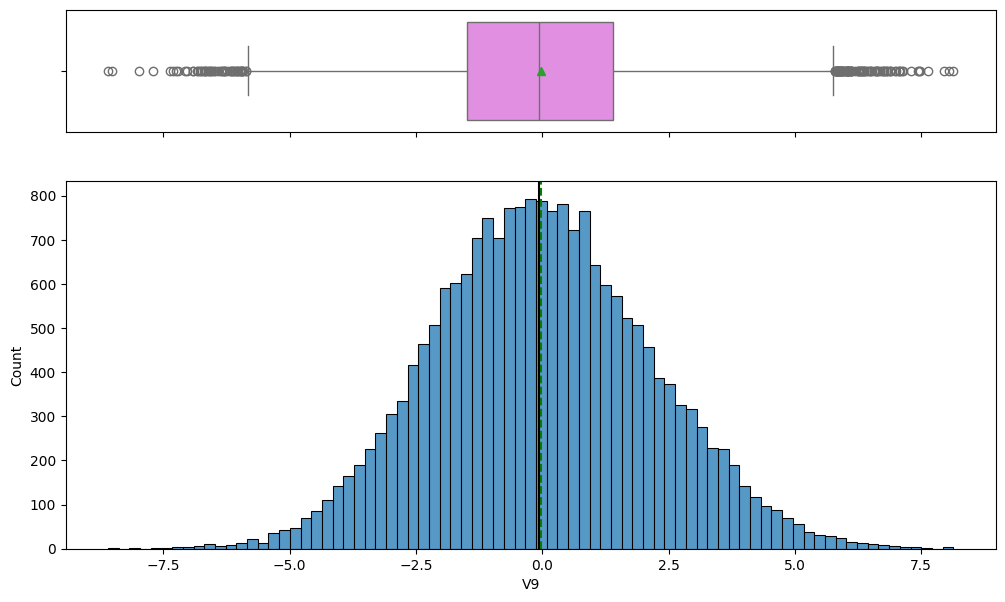

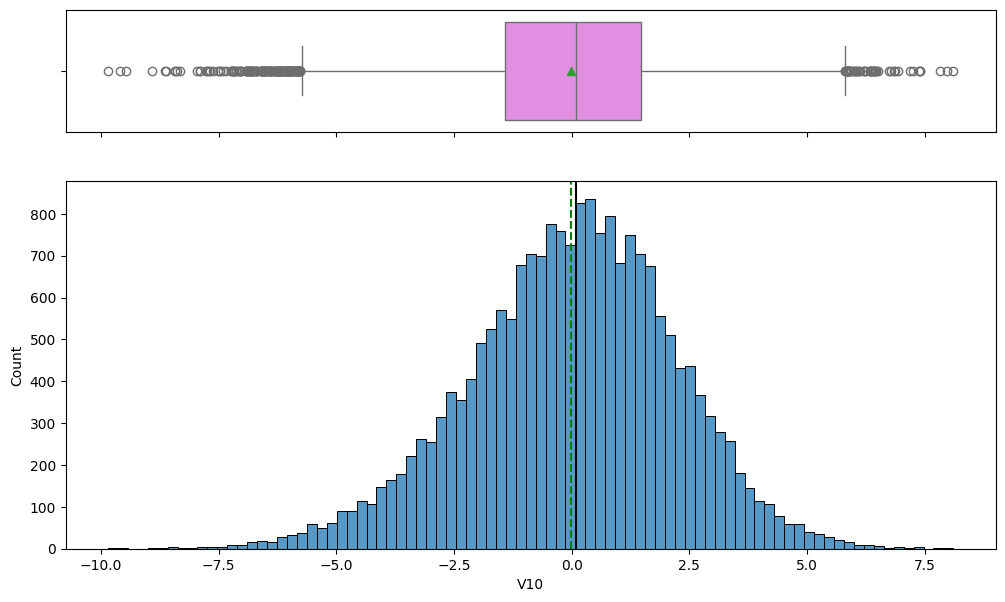

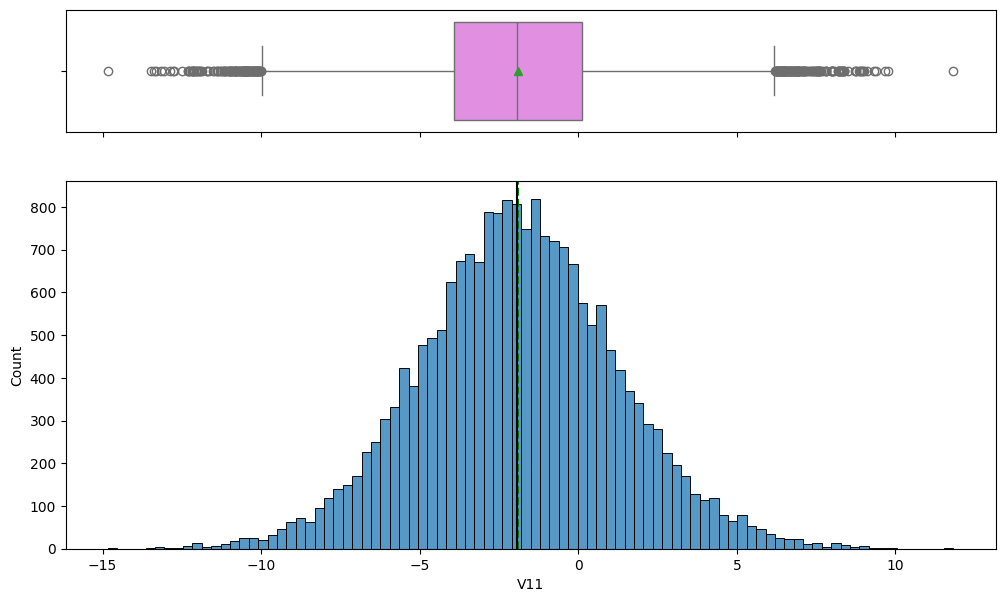

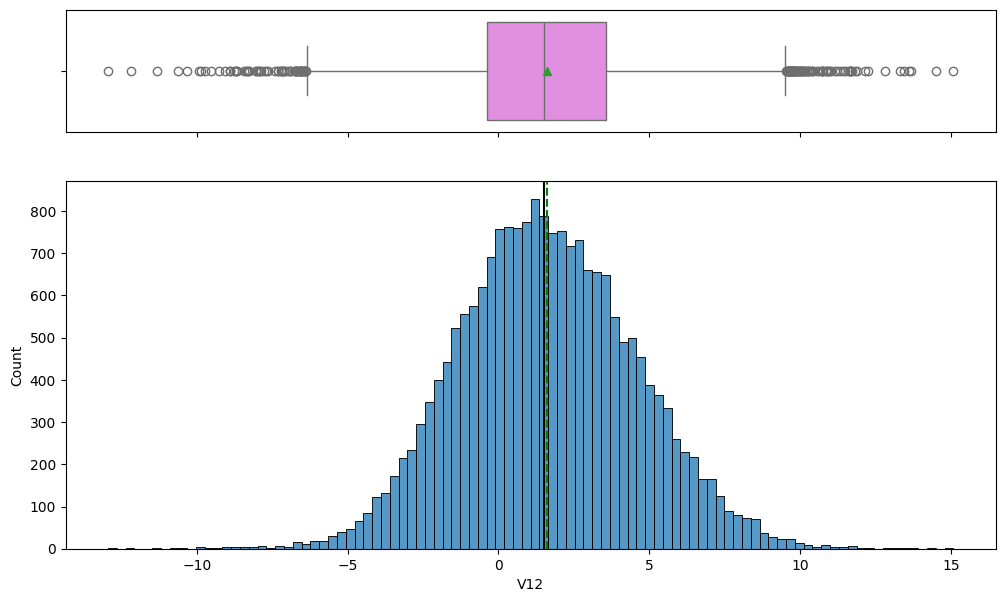

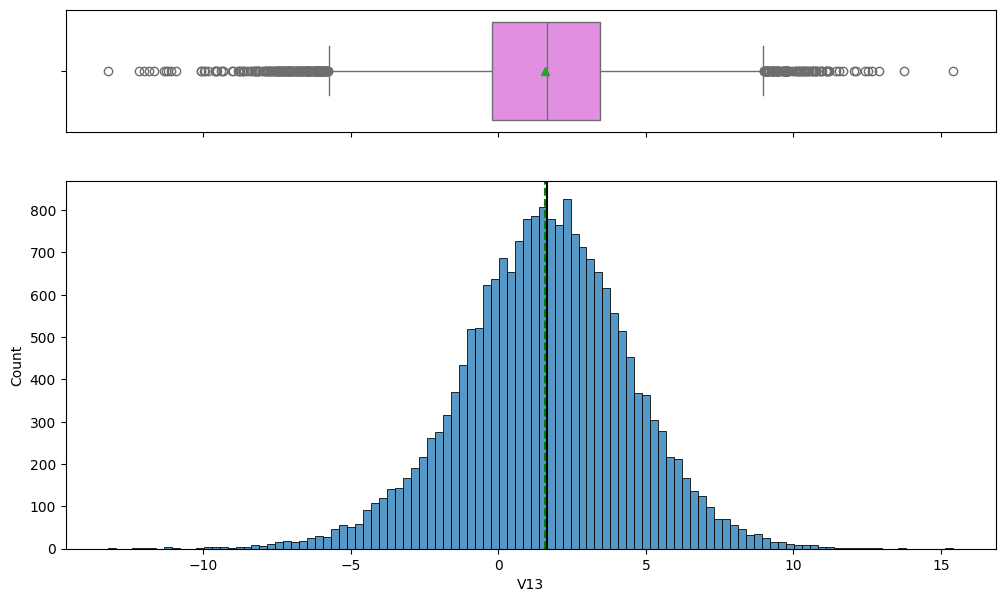

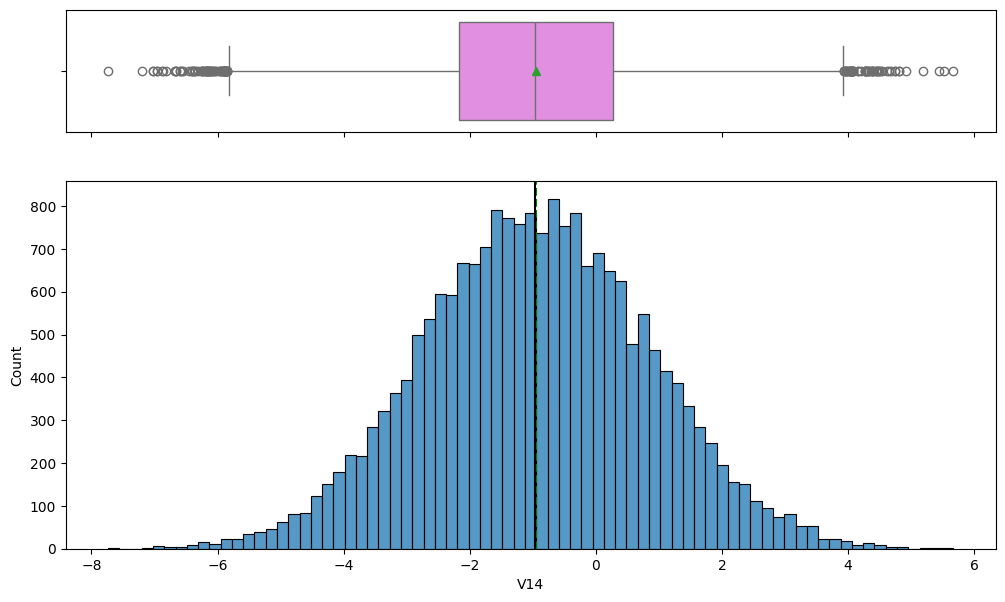

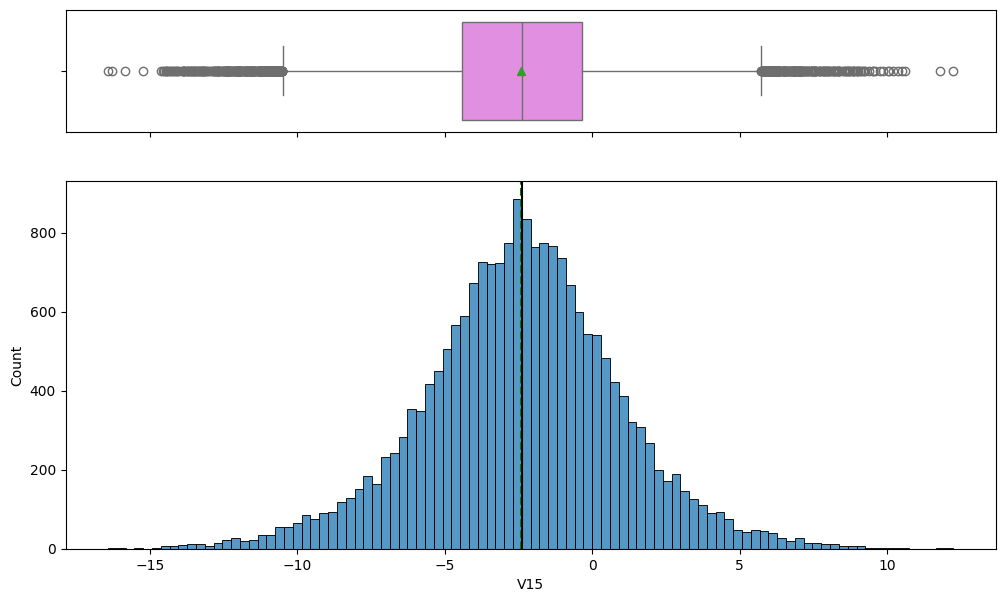

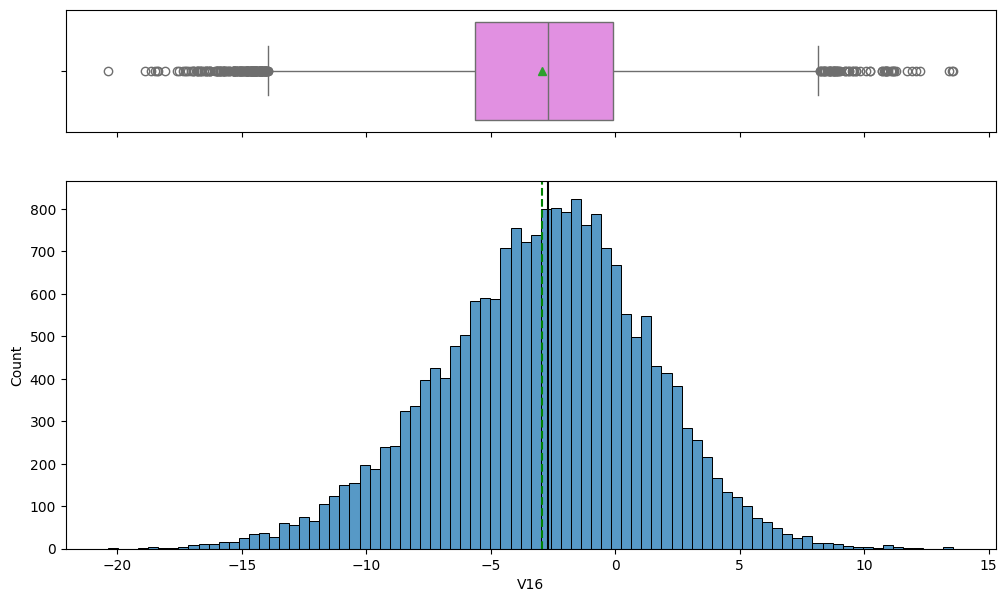

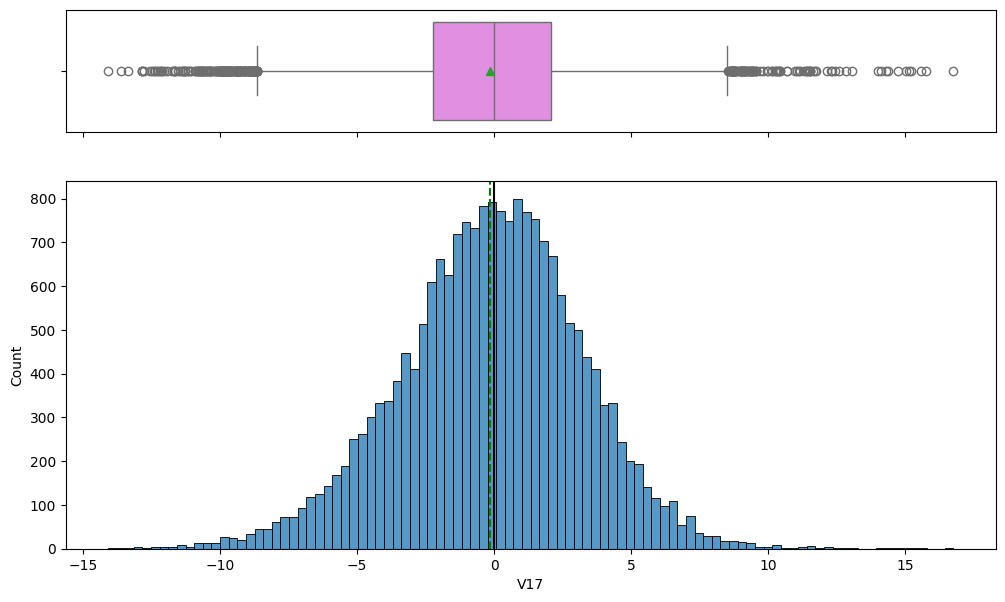

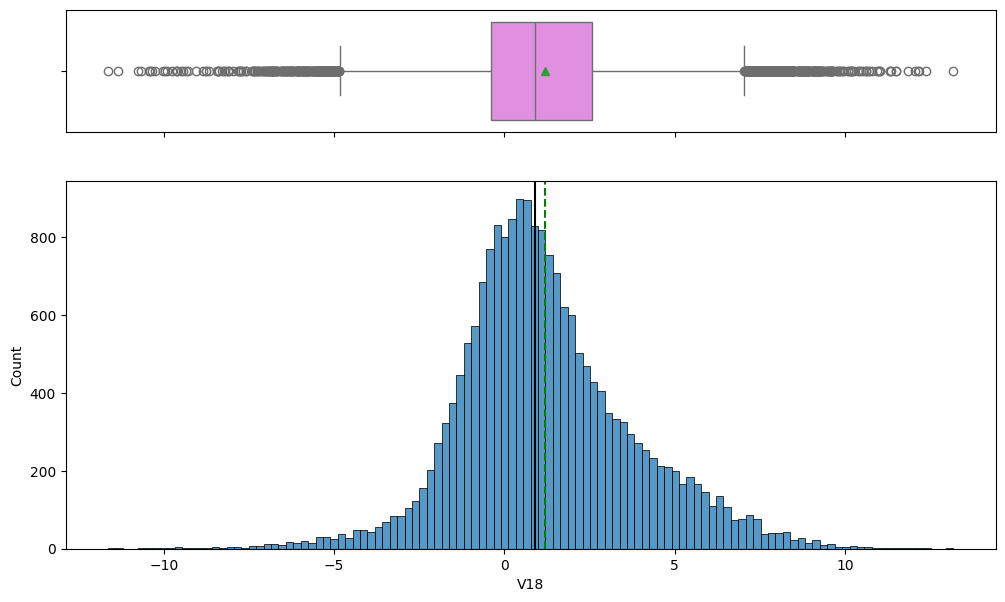

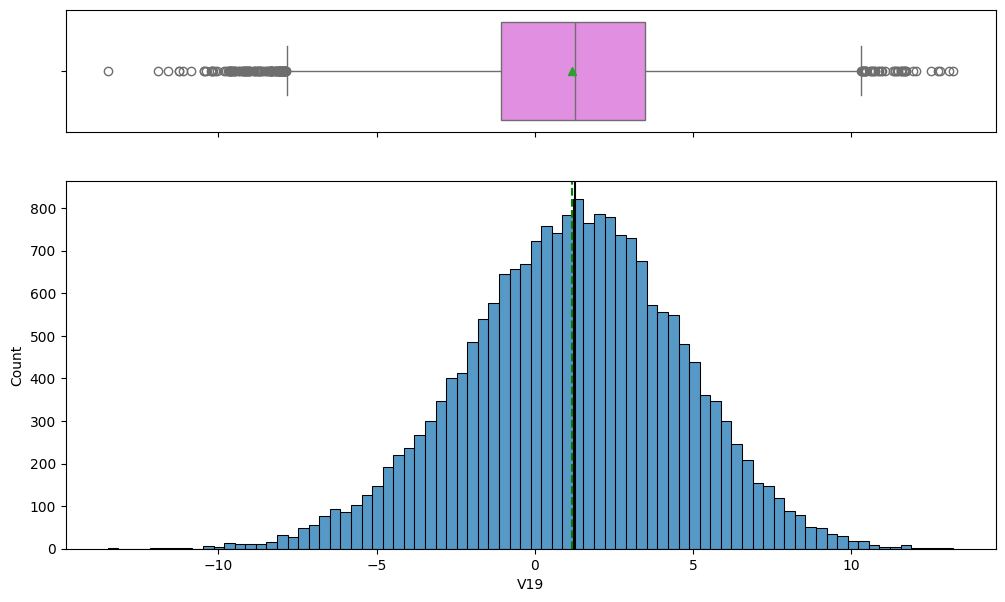

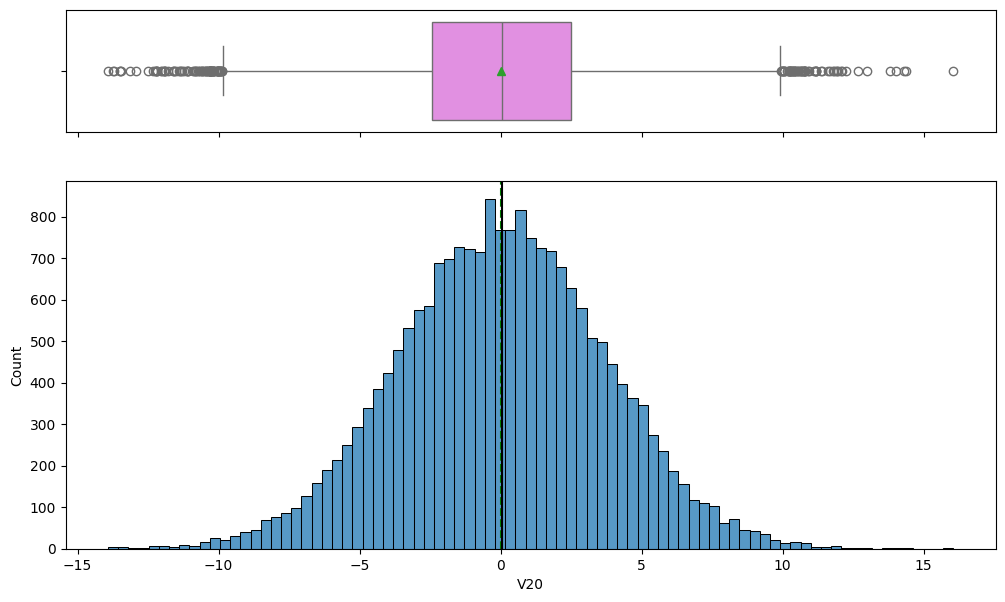

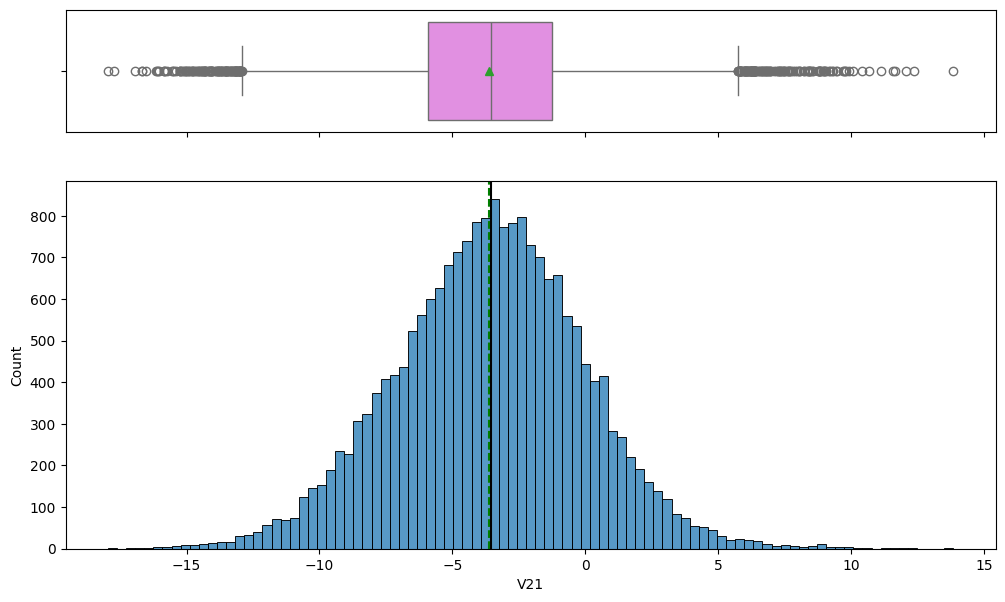

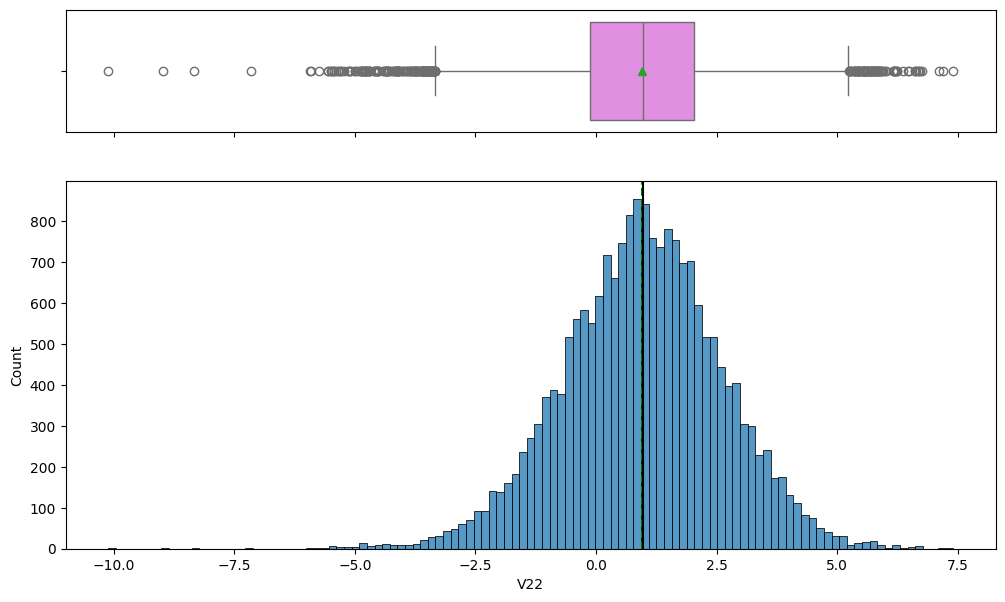

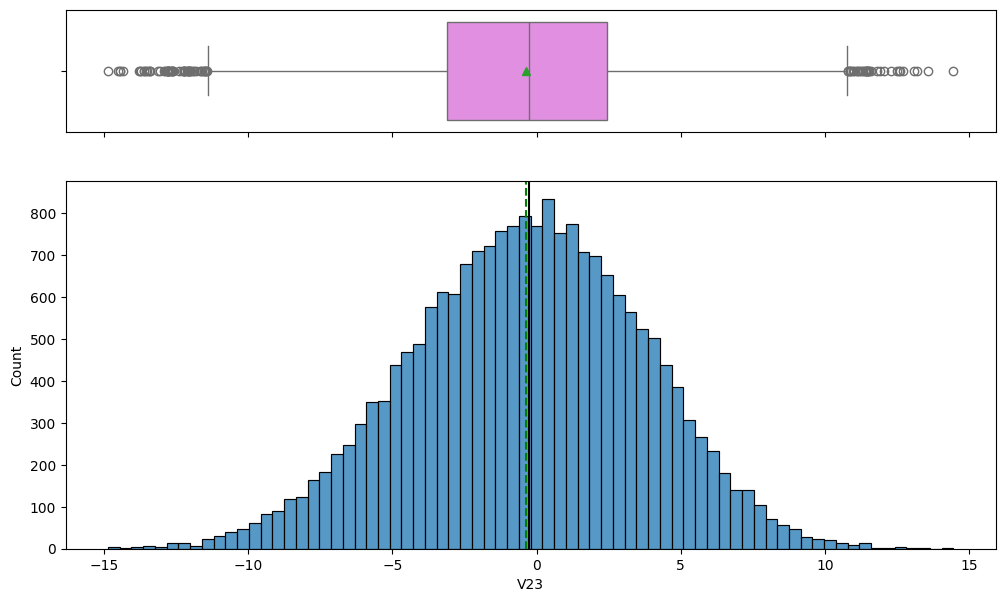

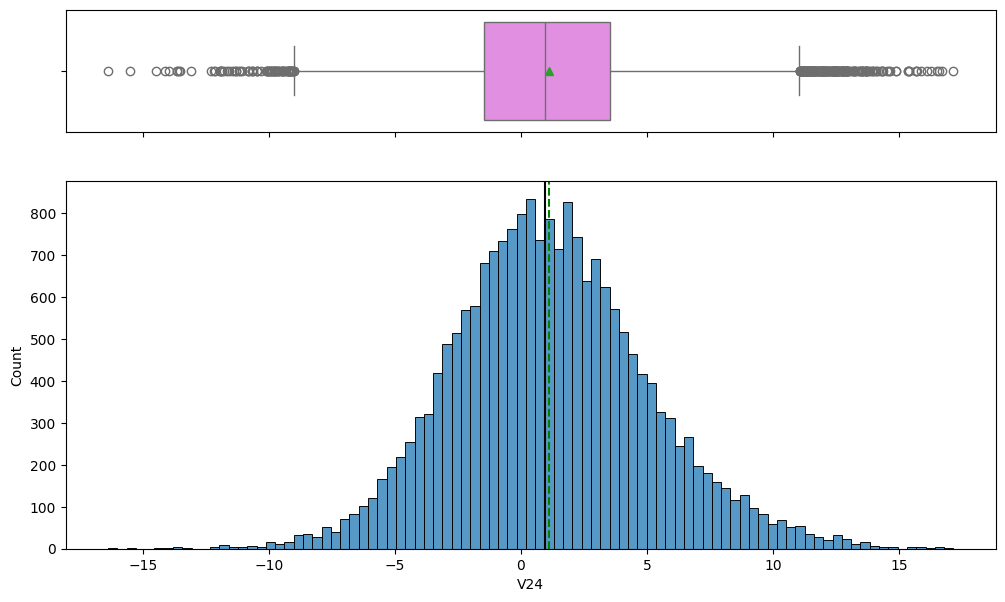

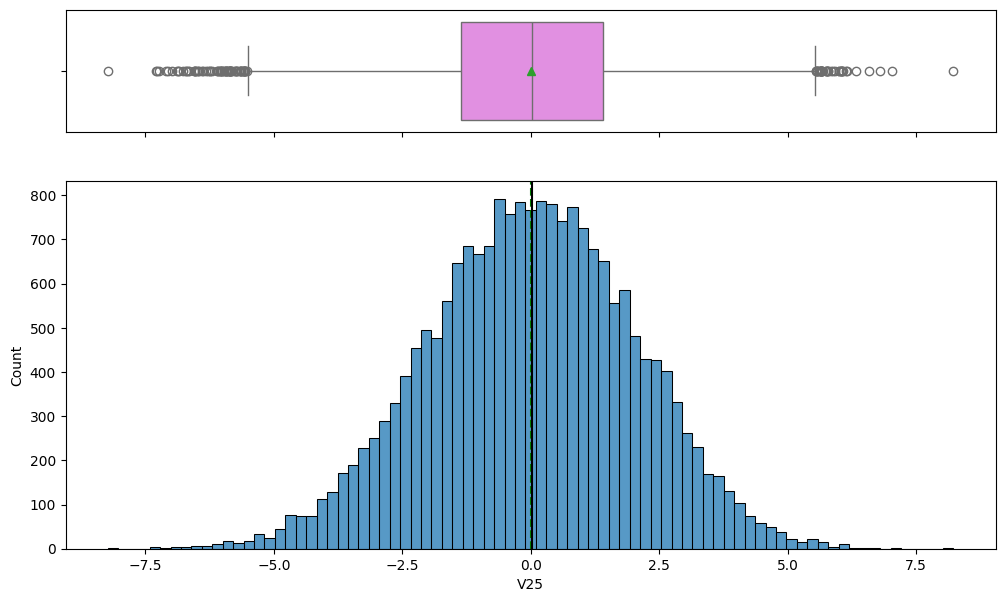

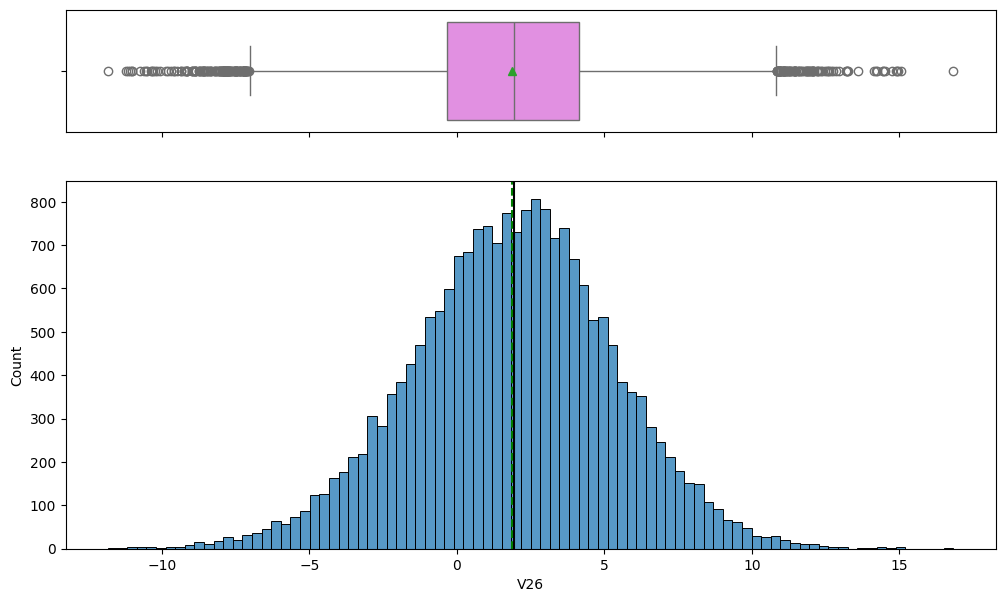

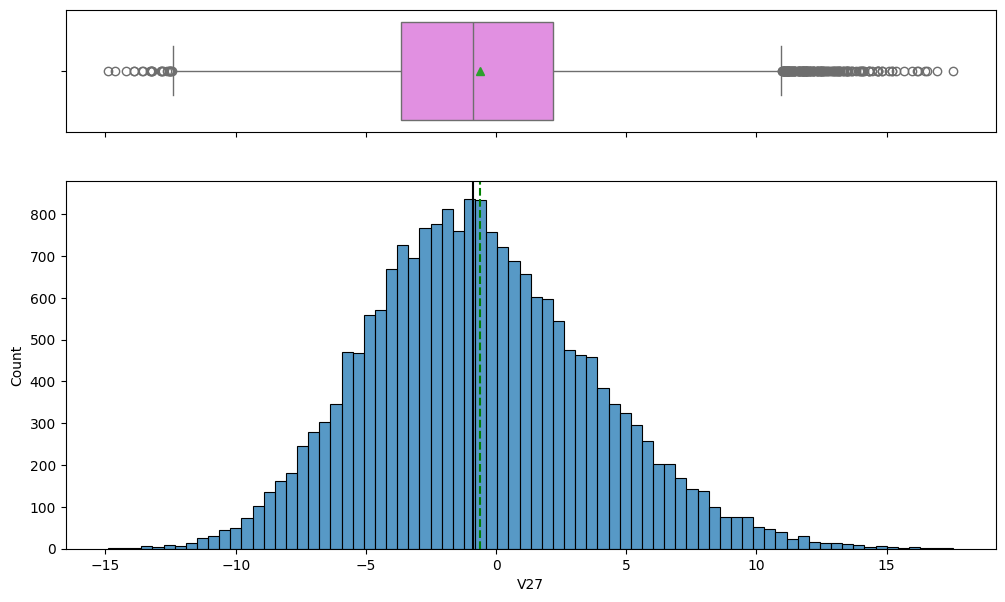

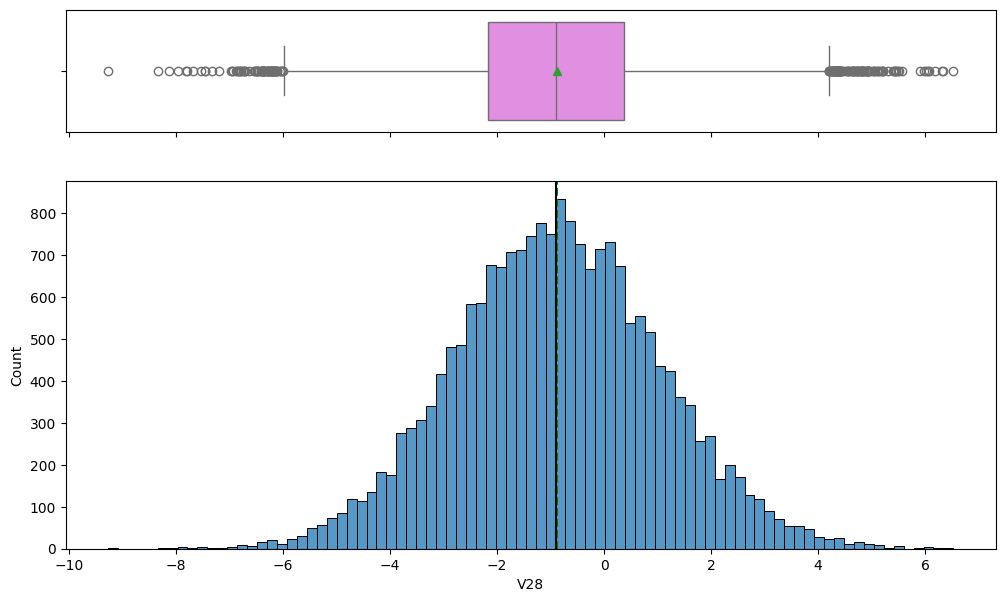

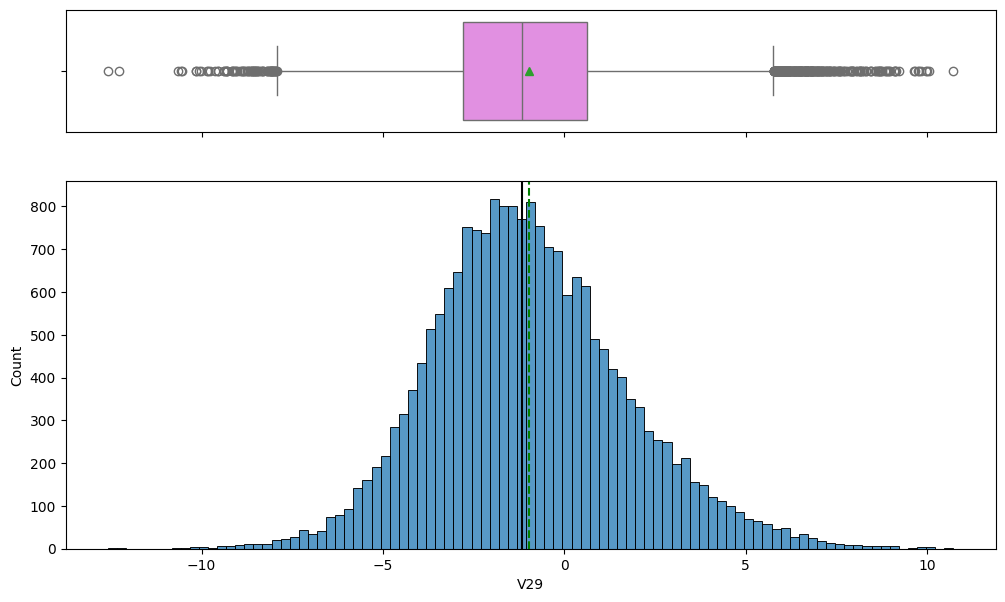

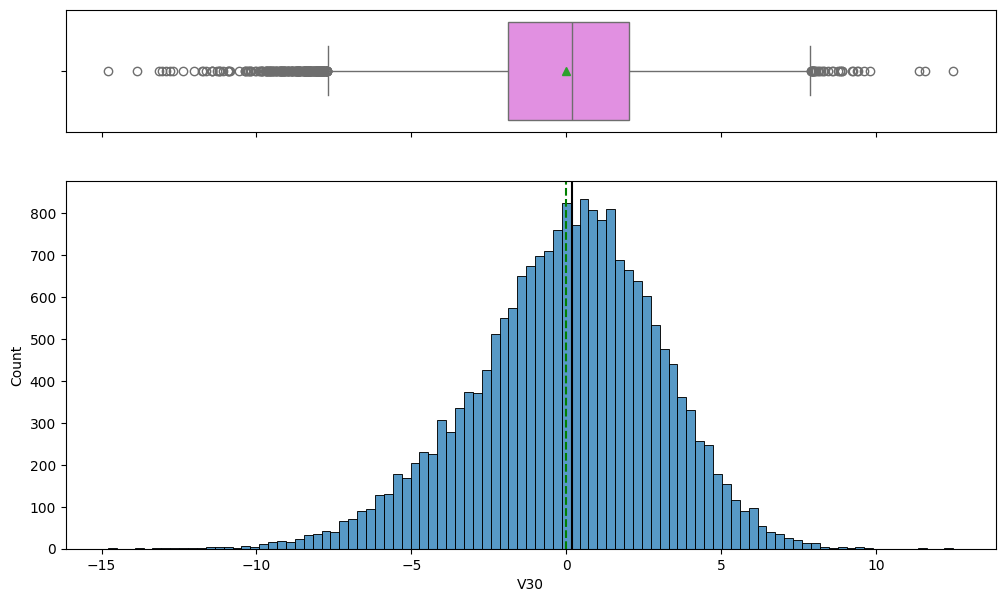

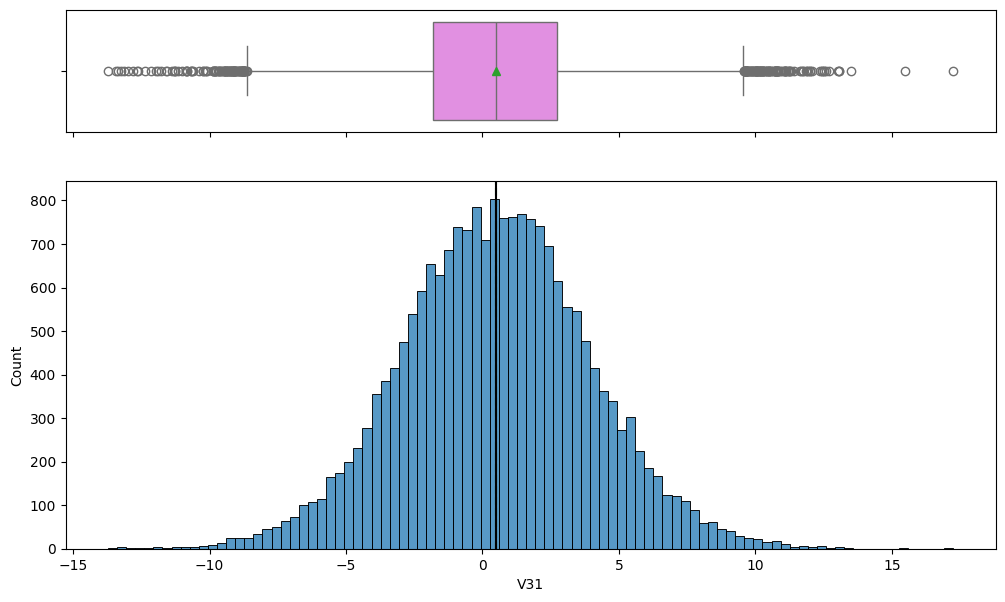

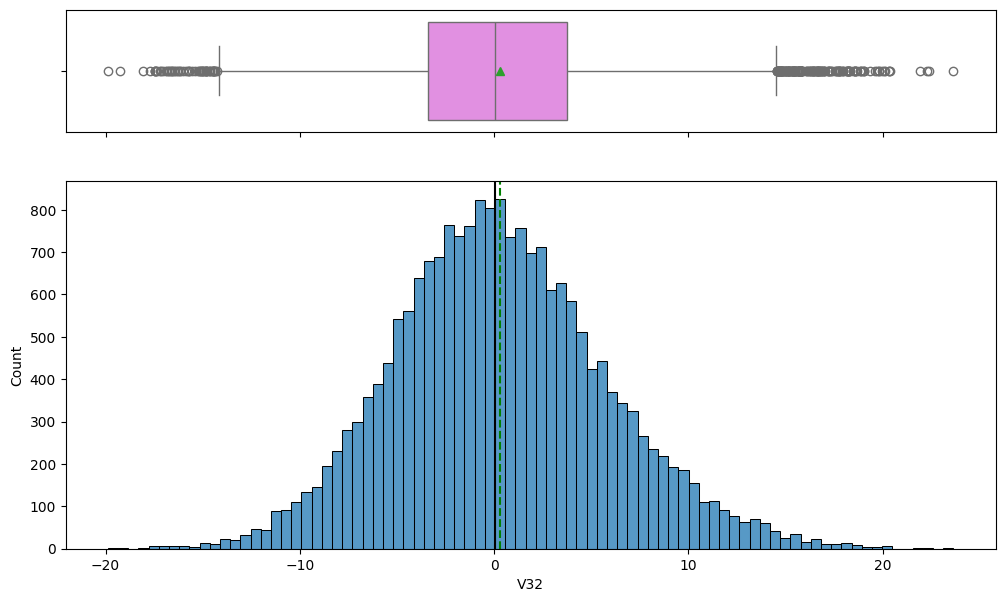

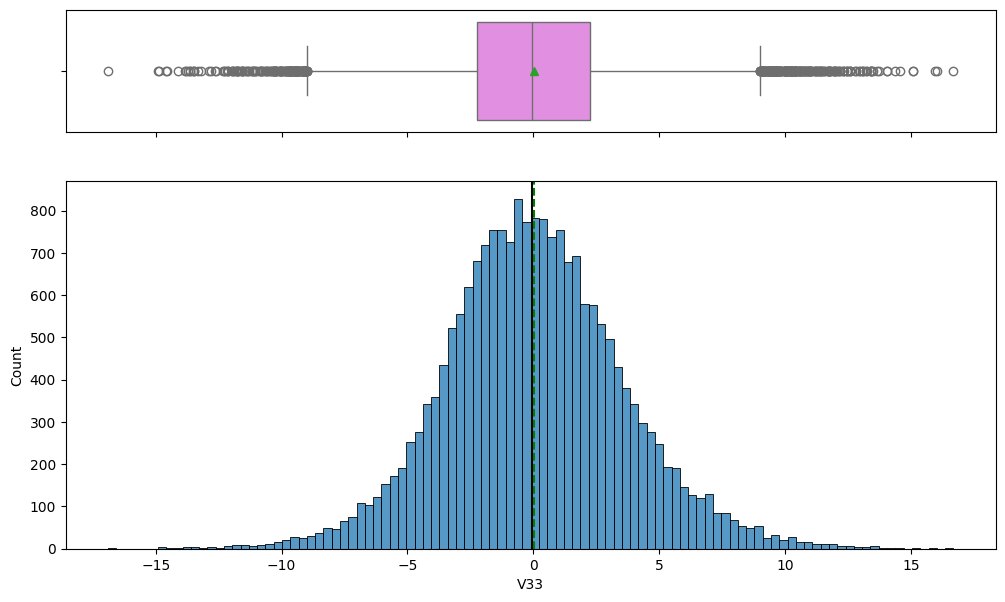

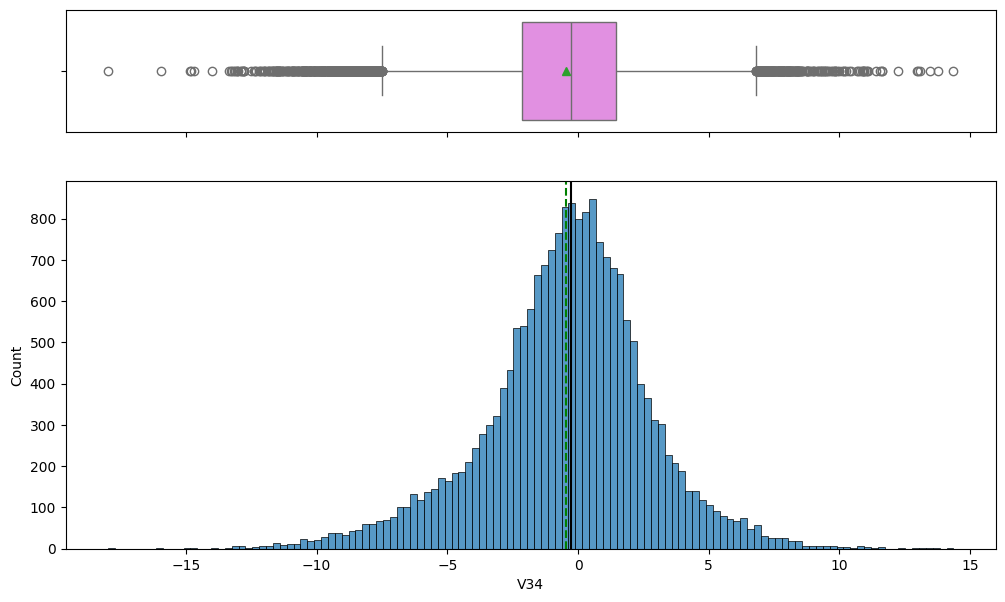

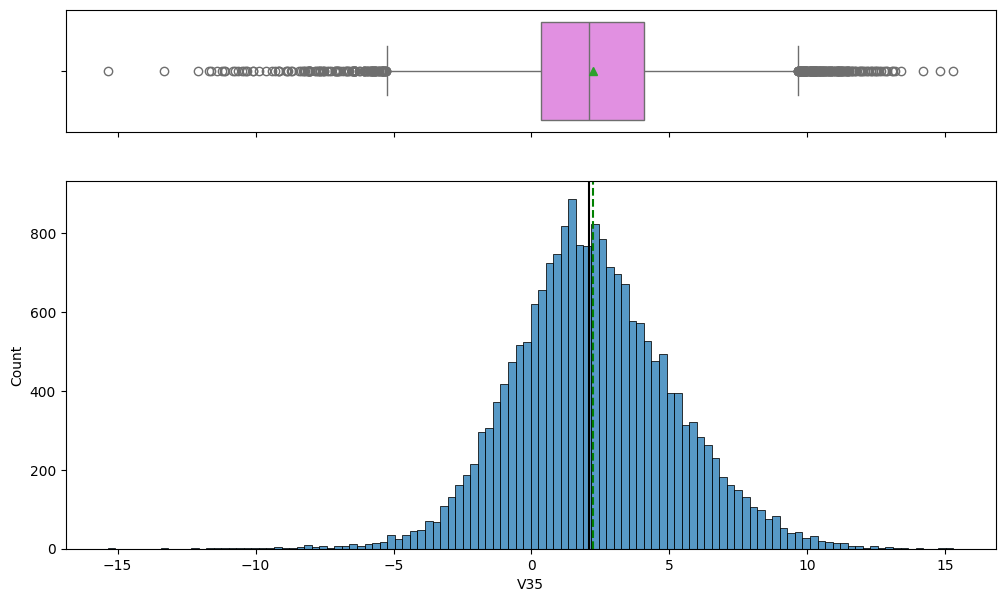

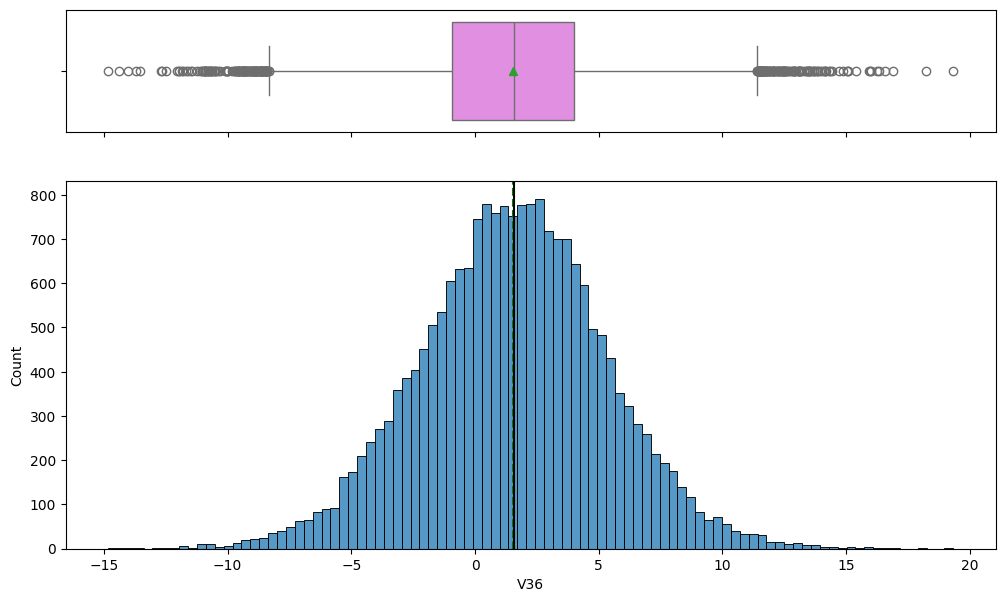

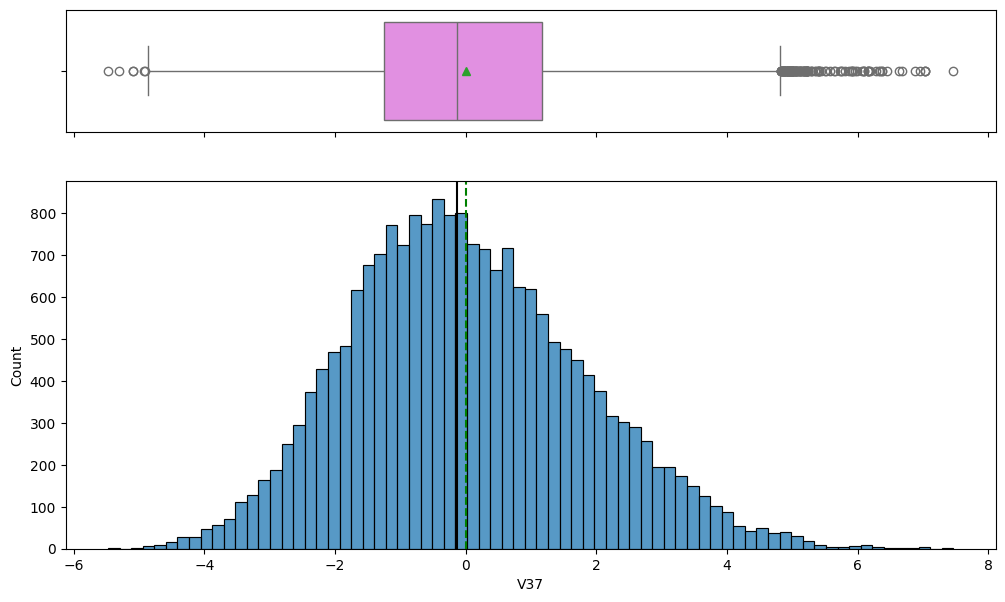

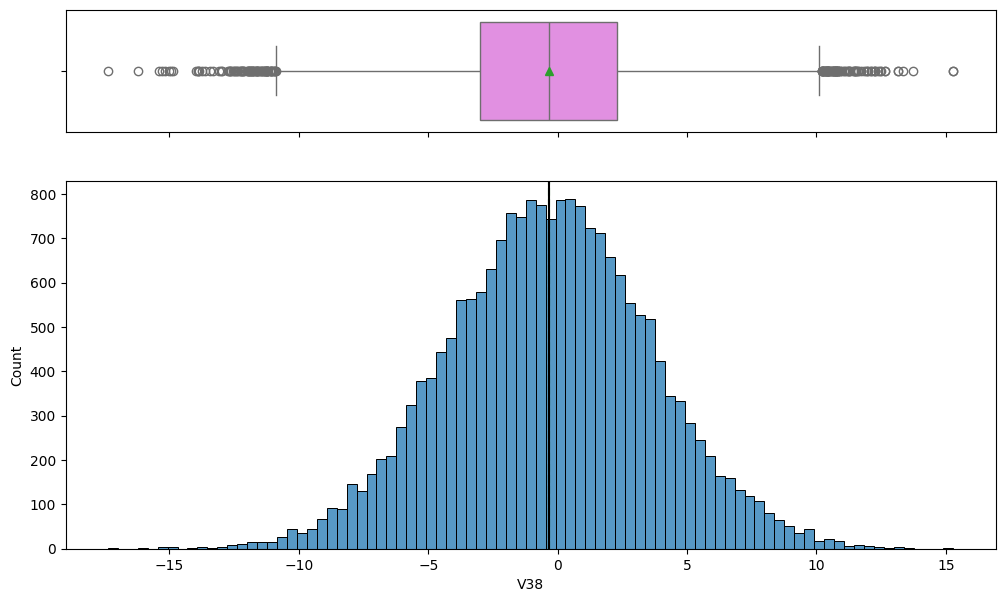

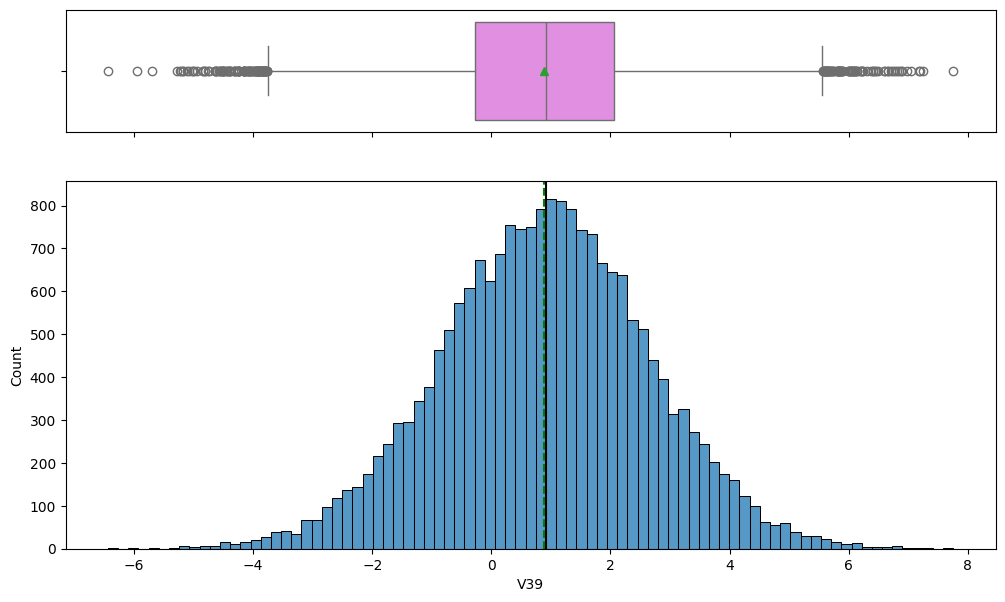

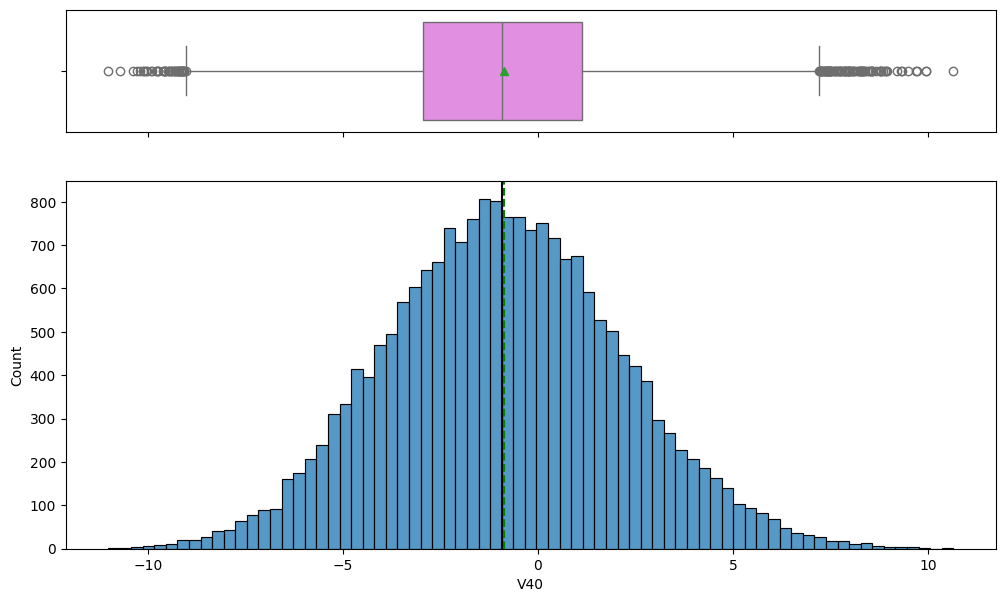

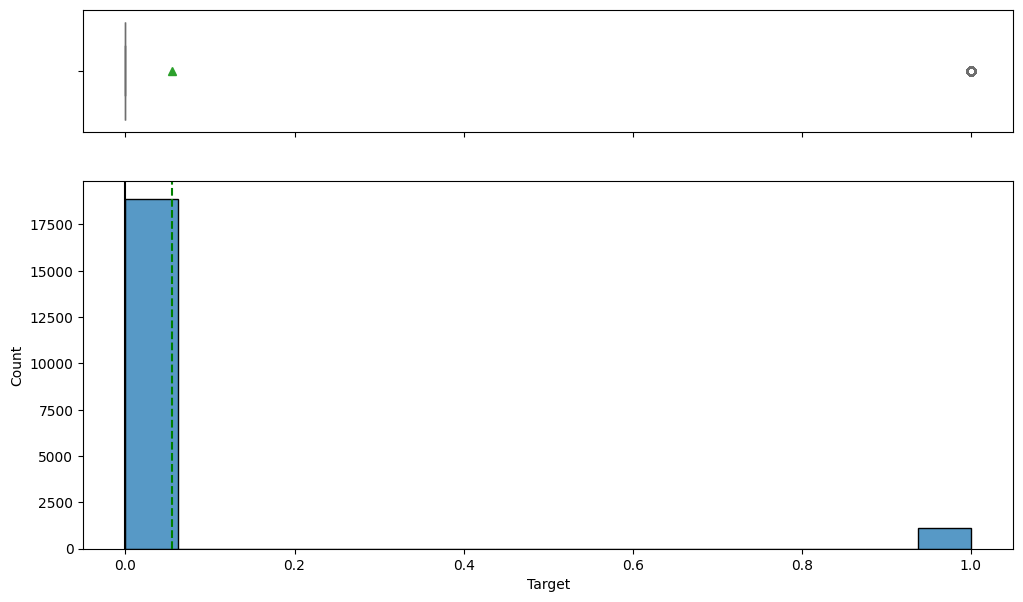

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

### Checking the distrubution of Target variable

In [ ]:
# For train data
df["Target"].value_counts(1)

,proportion
Target,
0,0.9445
1,0.0555


In [ ]:
# For test data
df_test["Target"].value_counts(1) # Complete the code to display the proportion of the target variable in the test data

,proportion
Target,
0,0.9436
1,0.0564


## Bivariate Analysis

### Correlation Check

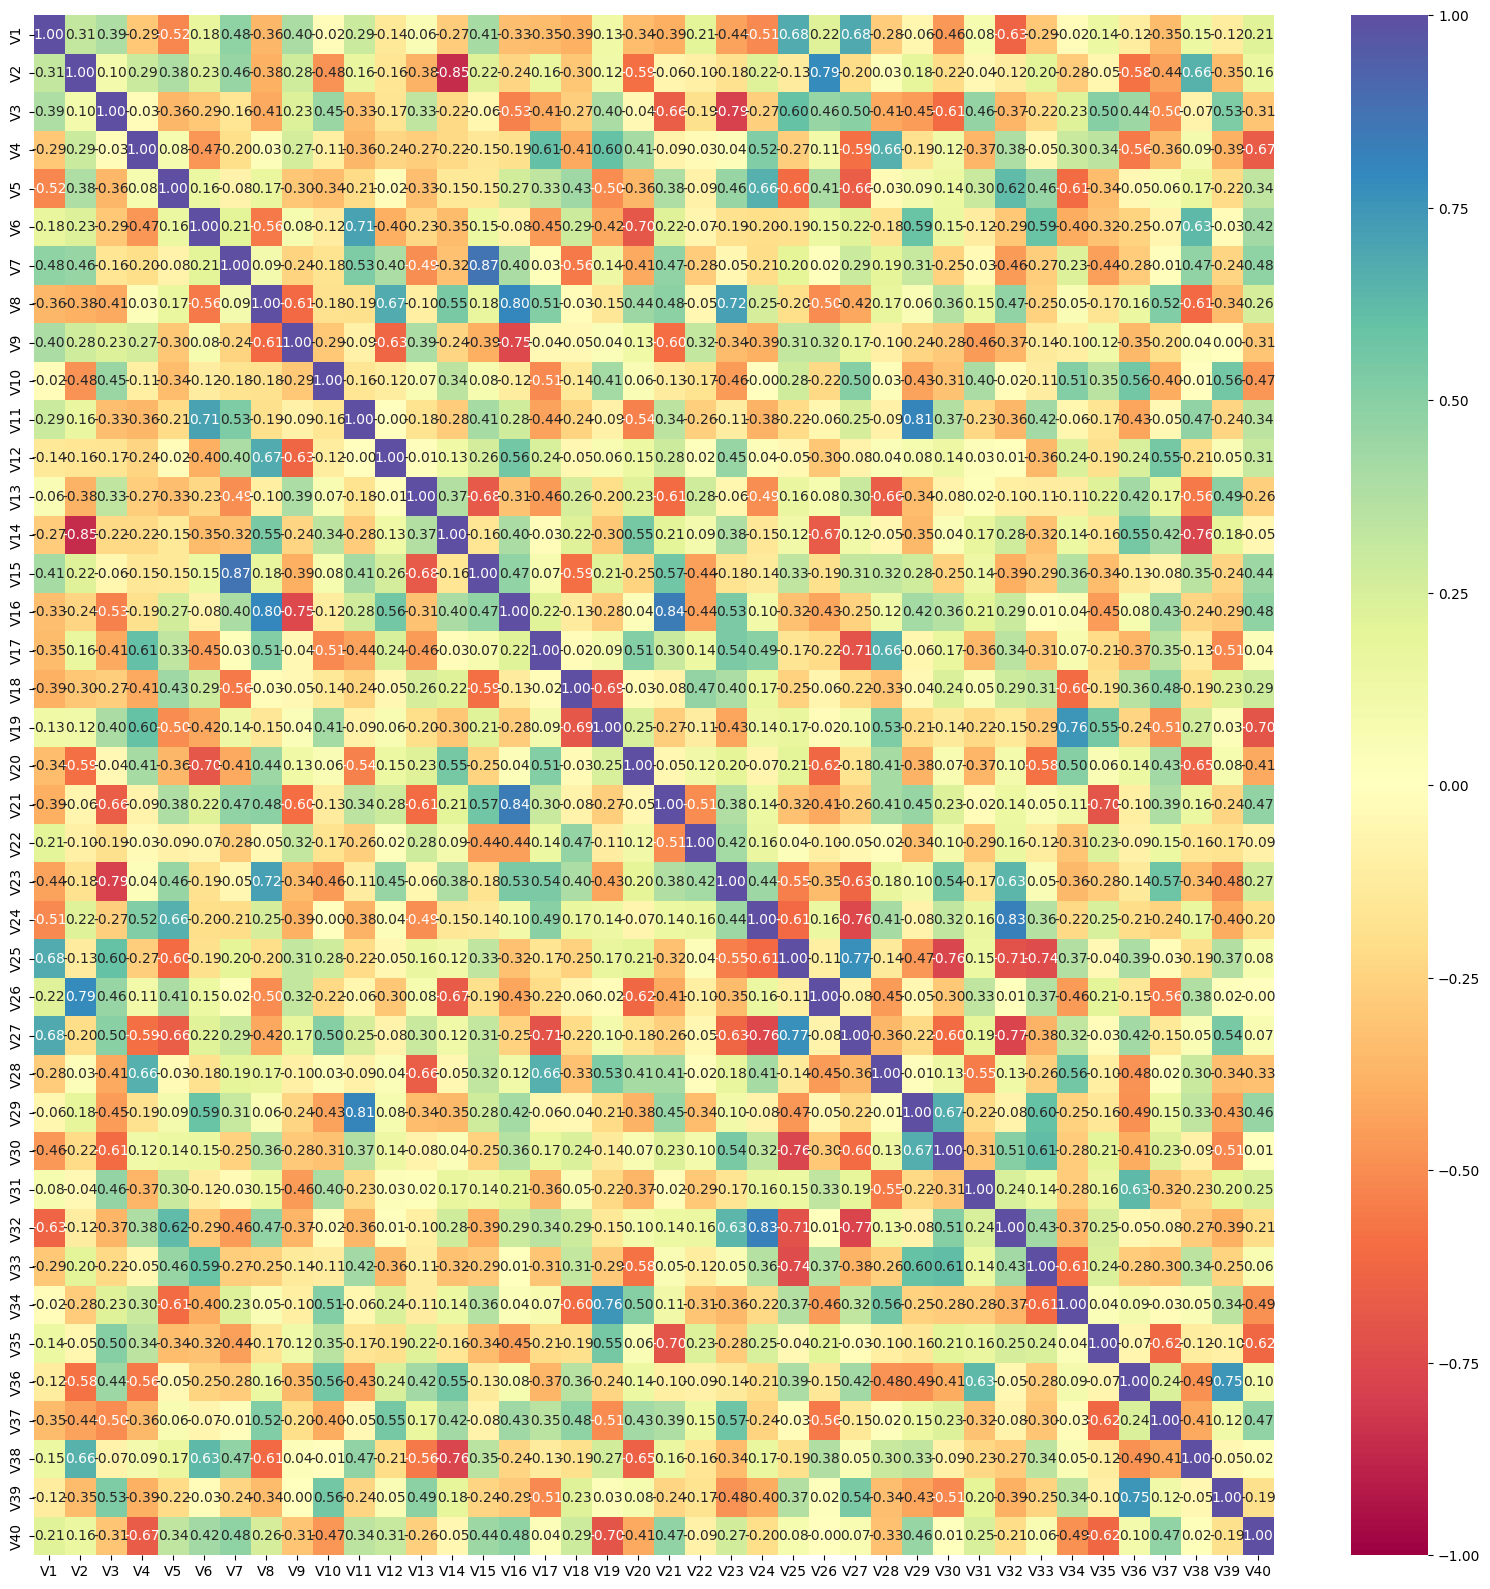

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# **Data Preprocessing**

## Data Preparation for Modeling

In [ ]:
# Dividing train data into X and y
X = data.drop(columns = ["Target"] , axis=1) # Code to remove the column named 'Target'
y = data["Target"] # Code to select the column named 'Target'

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


In [ ]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y # Complete the code to define the test size
)

In [ ]:
# Checking the number of rows and columns in the X_train data
X_train.shape

(14000, 40)

In [ ]:
# Checking the number of rows and columns in the X_val data
X_val.shape

(6000, 40)

In [ ]:
# Dividing test data into X_test and y_test
X_test = data_test.drop(columns = ['Target'] , axis= 1) # Complete the code to remove the target column
y_test = data_test["Target"] # Complete the code to select the target column

In [ ]:
# Checking the number of rows and columns in the X_test data
X_test.shape

(5000, 40)

## Missing Value Imputation


- There were few missing values in V1 and V2, we will impute them using the median.
- And to avoid data leakage we will impute missing values after splitting train data into train and validation sets.




In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_train.columns)    # Code to impute missing values in the validation set while accounting for data leakage

# Transform the test data
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_train.columns)    # Code to impute missing values in the test set while accounting for data leakage

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

In [ ]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# **Model Building**

## Model Evaluation Criterion

- Write down the metric of choice with rationale here

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Utility Functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer of 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 50    # Code to enter the number of epochs to be used in all models
batch_size = 32    # Code to enter the batch size to be used in all models

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense( 32 ,activation="relu",input_dim=X_train.shape[1])) # Code to define the number of neurons and the activation function
model_0.add(Dense( 1 ,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9237 - loss: 0.2474 - val_accuracy: 0.9678 - val_loss: 0.1253
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1152 - val_accuracy: 0.9758 - val_loss: 0.1062
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0954 - val_accuracy: 0.9788 - val_loss: 0.0946
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0836 - val_accuracy: 0.9817 - val_loss: 0.0881
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9828 - loss: 0.0734 - val_accuracy: 0.9833 - val_loss: 0.0827
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9833 - loss: 0.0722 - val_accuracy: 0.9842 - val_loss: 0.0797
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9836 - loss: 0.0692 - val_accuracy: 0.9852 - val_loss: 0.0774
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0628 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  115.87679672241211


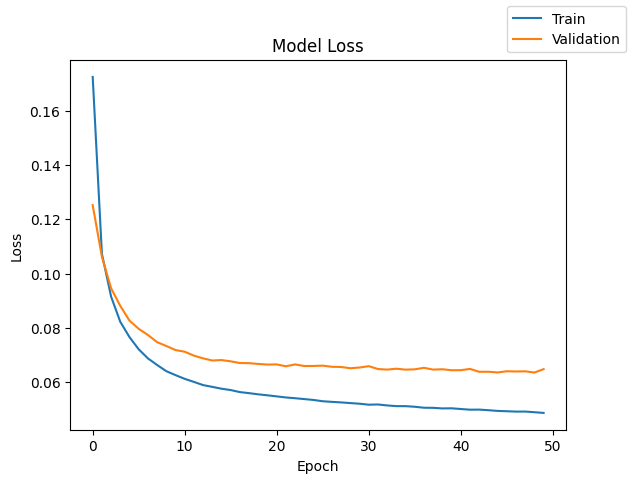

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.990429,0.922856,0.984391,0.95127


In [ ]:
model_0_val_perf = model_performance_classification(model_0,X_val,y_val)
model_0_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,Accuracy,Recall,Precision,F1 Score
0,0.987667,0.903022,0.976485,0.936293


Let's check the classification reports.

In [ ]:
y_train_pred_0 = model_0.predict(X_train)
y_val_pred_0 = model_0.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data Model_0",end="\n\n")
cr_train_model_0 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_0)

Classification Report - Train data Model_0

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13223
         1.0       0.98      0.85      0.91       777

    accuracy                           0.99     14000
   macro avg       0.98      0.92      0.95     14000
weighted avg       0.99      0.99      0.99     14000



In [ ]:
print("Classification Report - Validation data Model_0",end="\n\n")
cr_val_model_0 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_0)

Classification Report - Validation data Model_0

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5667
         1.0       0.96      0.81      0.88       333

    accuracy                           0.99      6000
   macro avg       0.98      0.90      0.94      6000
weighted avg       0.99      0.99      0.99      6000



# **Model Performance Improvement**

## Model 1

- Let's try adding another layer to see if we can improve our model's performance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense( 64 ,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_1.add(Dense( 32,activation="relu")) # Complete the code to define the number of neurons and activation function
model_1.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.1550 - loss: 0.1975 - val_Recall: 0.6126 - val_loss: 0.1113
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.5410 - loss: 0.1026 - val_Recall: 0.6877 - val_loss: 0.0926
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Recall: 0.7044 - loss: 0.0736 - val_Recall: 0.7477 - val_loss: 0.0827
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.7476 - loss: 0.0668 - val_Recall: 0.7598 - val_loss: 0.0763
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.7306 - loss: 0.0679 - val_Recall: 0.7898 - val_loss: 0.0721
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8008 - loss: 0.0593 - val_Recall: 0.7928 - val_loss: 0.0694
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8014 - loss: 0.0525 - val_Recall: 0.7988 - val_loss: 0.0671
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7973 - loss: 0.0577 - val_Recall: 0.7988 - val_loss: 0.0665
Epoch 9/

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  106.59043407440186


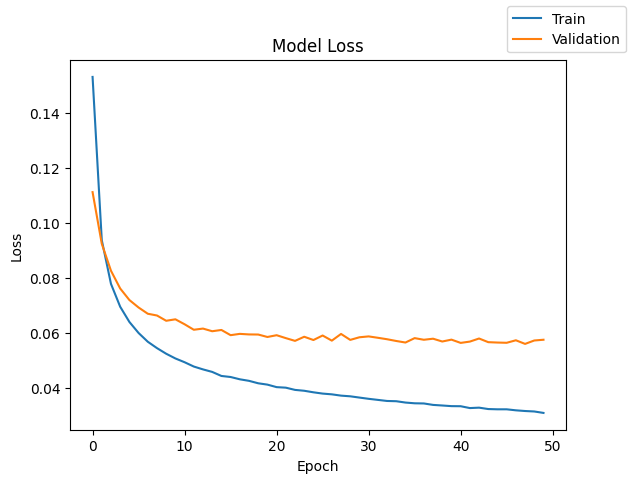

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model_1,X_train,y_train)
model_1_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.993857,0.95011,0.990756,0.969441


In [ ]:
model_1_val_perf = model_performance_classification(model_1,X_val,y_val)
model_1_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.990333,0.924219,0.981875,0.950976


In [ ]:
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("Classification Report - Train data Model_1", end="\n\n")
cr_train_model_1 = classification_report(y_train,y_train_pred_1 > 0.5)
print(cr_train_model_1)

Classification Report - Train data Model_1

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     13223
         1.0       0.99      0.90      0.94       777

    accuracy                           0.99     14000
   macro avg       0.99      0.95      0.97     14000
weighted avg       0.99      0.99      0.99     14000



In [ ]:
print("Classification Report - Validation data Model_1", end="\n\n")
cr_val_model_1 = classification_report(y_val,y_val_pred_1 > 0.5)
print(cr_val_model_1)

Classification Report - Validation data Model_1

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5667
         1.0       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 2

To introduce Regularization in our model, let's set the dropout to 50% after adding the first hidden layer. This step will randomly drop 50% of the neurons before proceeding to the next layer, reducing overfitting.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_2 = Sequential()
model_2.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))  # Complete the code to define the number of neurons and activation function
model_2.add(Dropout(0.5)) # Complete the code to define the dropout rate
model_2.add(Dense(32,activation = "relu")) # Complete the code to define the number of neurons and activation function
model_2.add(Dense(16,activation = "relu")) # Complete the code to define the number of neurons and activation function
model_2.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.1678 - loss: 0.3681 - val_Precision: 0.9836 - val_loss: 0.1476
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.8324 - loss: 0.1582 - val_Precision: 0.9699 - val_loss: 0.1247
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.8871 - loss: 0.1421 - val_Precision: 0.9709 - val_loss: 0.1090
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Precision: 0.8356 - loss: 0.1196 - val_Precision: 0.9638 - val_loss: 0.1002
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.8534 - loss: 0.1166 - val_Precision: 0.9565 - val_loss: 0.0939
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.8760 - loss: 0.1077 - val_Precision: 0.9555 - val_loss: 0.0893
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.8806 - loss: 0.0993 - val_Precision: 0.9630 - val_loss: 0.0847
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Precision: 0.8813 - loss: 0.1112 - v

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  114.47508406639099


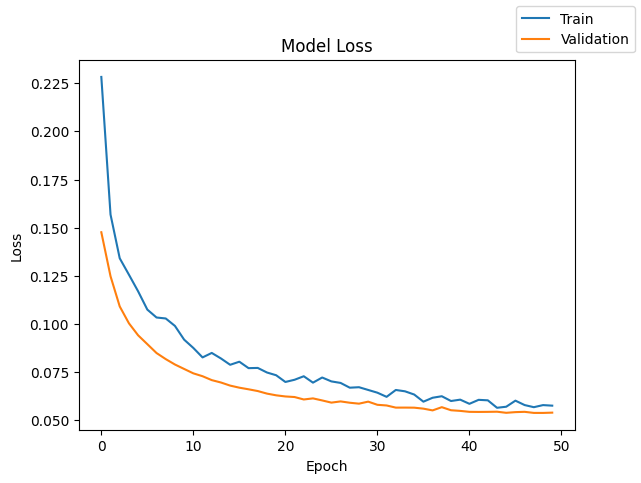

In [ ]:
plot(history,'loss')

Lets check the model performance of model_2 on training and validation data respectively.

In [ ]:
model_2_train_perf = model_performance_classification(model_2,X_train,y_train)
model_2_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.990786,0.923045,0.988052,0.952934


In [ ]:
model_2_val_perf = model_performance_classification(model_2,X_val,y_val)
model_2_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.990167,0.921304,0.983295,0.949903


In [ ]:
y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Lets check the classification report of model_2 on training and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_2 = classification_report(y_train,y_train_pred_2 > 0.5)
print(cr_train_model_2)

Classification Report - Train data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     13223
         1.0       0.99      0.85      0.91       777

    accuracy                           0.99     14000
   macro avg       0.99      0.92      0.95     14000
weighted avg       0.99      0.99      0.99     14000



In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_2 = classification_report(y_val , y_val_pred_2 > 0.5)
print(cr_val_model_2)

Classification Report - Validation data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5667
         1.0       0.98      0.84      0.90       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 3

As we have are dealing with an imbalance in class distribution, we should also be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:


# Flatten y_train to 1D
y_train_flat = y_train.ravel()

# Calculate class weights
cw = y_train.shape[0] / np.bincount(y_train_flat.astype(int))

# Create dictionary mapping class index to its weight
cw_dict = {i: cw[i] for i in range(len(cw))}

cw_dict


{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_3 = Sequential()
model_3.add(Dense(64,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_3.add(Dropout(0.5)) # Complete the code to define the dropout rate
model_3.add(Dense(32,activation="relu")) # Complete the code to define the number of neurons and activation function
model_3.add(Dense(16, activation = "relu")) # Complete the code to define the number of neurons and activation function
model_3.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',  # or 'categorical_crossentropy' depending on your output
                metrics=['accuracy'])


In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size,
                      epochs=epochs,
                      class_weight=cw_dict)
end = time.time()


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7542 - loss: 1.1317 - val_accuracy: 0.9473 - val_loss: 0.2001
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8966 - loss: 0.6946 - val_accuracy: 0.9613 - val_loss: 0.2025
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9281 - loss: 0.5531 - val_accuracy: 0.9777 - val_loss: 0.1617
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9471 - loss: 0.5124 - val_accuracy: 0.9792 - val_loss: 0.1514
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9551 - loss: 0.4500 - val_accuracy: 0.9760 - val_loss: 0.1702
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9556 - loss: 0.4636 - val_accuracy: 0.9852 - val_loss: 0.1229
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9595 - loss: 0.4171 - val_accuracy: 0.9862 - val_loss: 0.1523
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9620 - loss: 0.4139 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  121.25323295593262


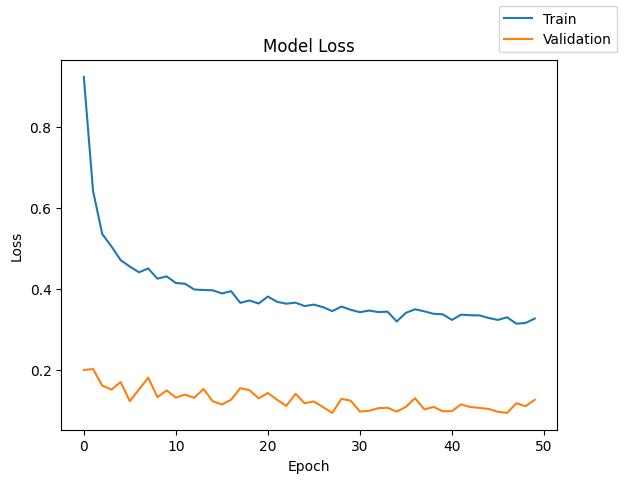

In [ ]:
plot(history,'loss')

Lets check the model performance of model_3 on training and validation data respectively.

In [ ]:
model_3_train_perf = model_performance_classification(model_3,X_train,y_train)
model_3_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.992,0.960029,0.963399,0.961707


In [ ]:
model_3_val_perf = model_performance_classification(model_3,X_val,y_val)
model_3_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.989833,0.940914,0.960493,0.950462


In [ ]:
y_train_pred_3 = model_3.predict(X_train)
y_val_pred_3 = model_3.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Lets check the classification report of model_3 on training and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_3", end="\n\n")
cr_train_model_3 = classification_report(y_train,y_train_pred_3 > 0.5)
print(cr_train_model_3)

Classification Report - Train data Model_3

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13223
         1.0       0.93      0.92      0.93       777

    accuracy                           0.99     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [ ]:
print("Classification Report - Validation data Model_3", end="\n\n")
cr_val_model_3 = classification_report(y_val,y_val_pred_3 > 0.5)
print(cr_val_model_3)

Classification Report - Validation data Model_3

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5667
         1.0       0.93      0.89      0.91       333

    accuracy                           0.99      6000
   macro avg       0.96      0.94      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 4

Since we have used only SGD optimizer till now, let's use another kind of optimizer and observe its impact on the model performmance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(128,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_4.add(Dense(64,activation="relu")) # Complete the code to define the number of neurons and activation function
model_4.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9716 - loss: 0.1124 - val_accuracy: 0.9867 - val_loss: 0.0724
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9900 - loss: 0.0546 - val_accuracy: 0.9892 - val_loss: 0.0597
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9915 - loss: 0.0419 - val_accuracy: 0.9888 - val_loss: 0.0600
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9917 - loss: 0.0430 - val_accuracy: 0.9905 - val_loss: 0.0597
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0388 - val_accuracy: 0.9875 - val_loss: 0.0620
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9929 - loss: 0.0346 - val_accuracy: 0.9918 - val_loss: 0.0565
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9930 - loss: 0.0373 - val_accuracy: 0.9908 - val_loss: 0.0581
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0319 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  111.03714156150818


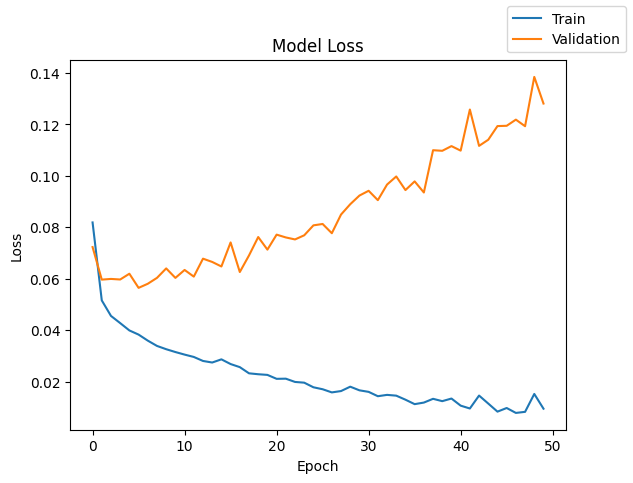

In [ ]:
plot(history,'loss')

Lets check the model performance ofr model_4 on training and validation data respectively

In [ ]:
model_4_train_perf = model_performance_classification(model_4,X_train,y_train)
model_4_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.997643,0.97937,0.998123,0.988543


In [ ]:
model_4_val_perf = model_performance_classification(model_4,X_val,y_val)
model_4_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.991,0.937291,0.975089,0.955304


In [ ]:
y_train_pred_4 = model_4.predict(X_train)
y_val_pred_4 = model_4.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Lets check the classification report of model_4 on raining and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_4", end="\n\n")
cr_train_model_4 = classification_report(y_train,y_train_pred_4 > 0.5)
print(cr_train_model_4)

Classification Report - Train data Model_4

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13223
         1.0       1.00      0.96      0.98       777

    accuracy                           1.00     14000
   macro avg       1.00      0.98      0.99     14000
weighted avg       1.00      1.00      1.00     14000



In [ ]:
print("Classification Report - Validation data Model_4", end="\n\n")
cr_val_model_4 = classification_report(y_val,y_val_pred_4 > 0.5)
print(cr_val_model_4)

Classification Report - Validation data Model_4

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5667
         1.0       0.96      0.88      0.92       333

    accuracy                           0.99      6000
   macro avg       0.98      0.94      0.96      6000
weighted avg       0.99      0.99      0.99      6000



## Model 5

This time we will add more layers and dropout while using a different optimizer.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_5 = Sequential()
model_5.add(Dense(128,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_5.add(Dropout(0.5)) #Complete the code to define the dropout rate
model_5.add(Dense(64,activation="relu")) # Complete the code to define the number of neurons and activation function
model_5.add(Dense(32, activation = "relu")) # Complete the code to define the number of neurons and activation function
model_5.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons and activation function

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9154 - loss: 0.2437 - val_accuracy: 0.9828 - val_loss: 0.0854
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9773 - loss: 0.0842 - val_accuracy: 0.9853 - val_loss: 0.0717
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9838 - loss: 0.0649 - val_accuracy: 0.9890 - val_loss: 0.0586
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9857 - loss: 0.0617 - val_accuracy: 0.9897 - val_loss: 0.0570
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9858 - loss: 0.0620 - val_accuracy: 0.9898 - val_loss: 0.0588
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0567 - val_accuracy: 0.9902 - val_loss: 0.0559
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9894 - loss: 0.0512 - val_accuracy: 0.9910 - val_loss: 0.0566
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0505 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  122.11403012275696


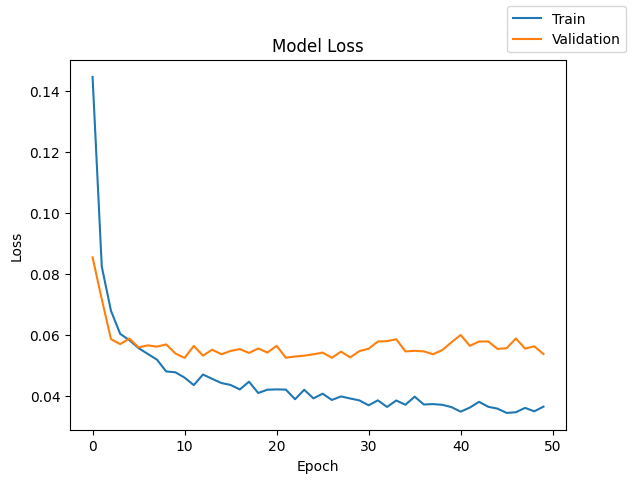

In [ ]:
plot(history,'loss')

Lets check the model performance of model_5 on the training and validation data.

In [ ]:
model_5_train_perf = model_performance_classification(model_5,X_train,y_train)
model_5_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.994714,0.955409,0.993897,0.973772


In [ ]:
model_5_val_perf = model_performance_classification(model_5,X_val,y_val)
model_5_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.992667,0.941,0.988218,0.963255


In [ ]:
y_train_pred_5 = model_5.predict(X_train)
y_val_pred_5 = model_5.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Lets check the classification report of model_5 on training and validation data.

In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_5 = classification_report(y_train,y_train_pred_5 > 0.5)
print(cr_train_model_5)

Classification Report - Train data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     13223
         1.0       0.99      0.91      0.95       777

    accuracy                           0.99     14000
   macro avg       0.99      0.96      0.97     14000
weighted avg       0.99      0.99      0.99     14000



In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_5 = classification_report(y_val,y_val_pred_5 > 0.5)
print(cr_val_model_5)

Classification Report - Validation data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5667
         1.0       0.98      0.88      0.93       333

    accuracy                           0.99      6000
   macro avg       0.99      0.94      0.96      6000
weighted avg       0.99      0.99      0.99      6000



## Model 6

Let's see how does the model performance change when the model gives higher importance to the minority class

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_6 = Sequential()
model_6.add(Dense(128,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_6.add(Dropout(0.5)) # Complete the code to define the dropout rate
model_6.add(Dense(64,activation="relu")) # Complete the code to define the number of neurons and activation function
model_6.add(Dense(32, activation = "relu")) # Complete the code to define the number of neurons and activation function
model_6.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
from sklearn.utils import class_weight
import numpy as np
import time

# Step 1: Convert one-hot encoded labels to class indices if needed
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# Step 2: Ensure y_train_labels is a flat array of ints
y_train_labels = np.asarray(y_train_labels).astype(int).flatten()

# Step 3: Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

# Step 4: Map class labels to weights
class_weights_dict = dict(zip(np.unique(y_train_labels), class_weights))

# Step 5: Train the model using class weights
start = time.time()
history = model_3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=class_weights_dict
)
end = time.time()


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9833 - loss: 0.1490 - val_accuracy: 0.9915 - val_loss: 0.1146
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.1425 - val_accuracy: 0.9910 - val_loss: 0.1046
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9761 - loss: 0.1766 - val_accuracy: 0.9913 - val_loss: 0.0964
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9799 - loss: 0.1614 - val_accuracy: 0.9913 - val_loss: 0.1028
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9808 - loss: 0.1540 - val_accuracy: 0.9900 - val_loss: 0.1444
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9778 - loss: 0.1624 - val_accuracy: 0.9912 - val_loss: 0.1152
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9797 - loss: 0.1514 - val_accuracy: 0.9918 - val_loss: 0.0989
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9854 - loss: 0.1431 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  113.14461851119995


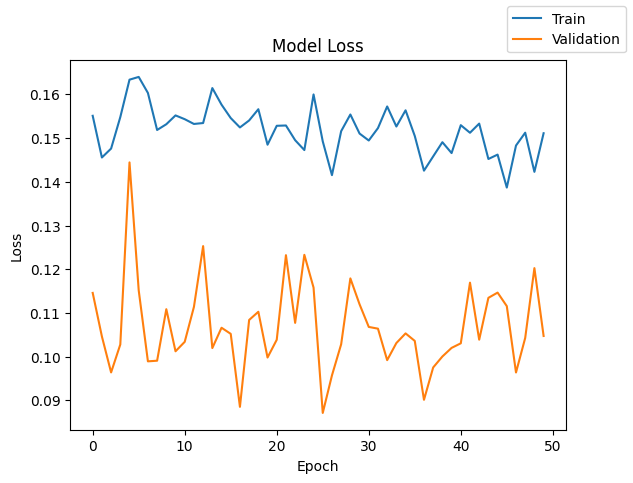

In [ ]:
plot(history,'loss')

Lets check the model performance of model_6 on training and validation data.

In [ ]:
model_6_train_perf = model_performance_classification(model_6,X_train,y_train)
model_6_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.847071,0.475073,0.485944,0.478201


In [ ]:
model_6_val_perf = model_performance_classification(model_6,X_val,y_val)
model_6_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8485,0.497231,0.498485,0.493568


In [ ]:
y_train_pred_6 = model_6.predict(X_train)
y_val_pred_6 = model_6.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Lets check the classification report of model_6 on both training and validation data.

In [ ]:
print("Classification Report - Train data Model_3", end="\n\n")
cr_train_model_6 = classification_report(y_train,y_train_pred_6 > 0.5)
print(cr_train_model_6)

Classification Report - Train data Model_3

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92     13223
         1.0       0.03      0.06      0.04       777

    accuracy                           0.85     14000
   macro avg       0.49      0.48      0.48     14000
weighted avg       0.89      0.85      0.87     14000



In [ ]:
print("Classification Report - Validation data Model_3", end="\n\n")
cr_val_model_6 = classification_report(y_val,y_val_pred_6 > 0.5)
print(cr_val_model_6)

Classification Report - Validation data Model_3

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      5667
         1.0       0.05      0.10      0.07       333

    accuracy                           0.85      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.89      0.85      0.87      6000



# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and test sets.

**Training Performance Comparison**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.990429,0.993857,0.990786,0.992000,0.997643,0.994714,0.847071
Recall,0.922856,0.950110,0.923045,0.960029,0.979370,0.955409,0.475073
Precision,0.984391,0.990756,0.988052,0.963399,0.998123,0.993897,0.485944
F1 Score,0.951270,0.969441,0.952934,0.961707,0.988543,0.973772,0.478201


**Validation Performance Comparison**

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.987667,0.990333,0.990167,0.989833,0.991000,0.992667,0.848500
Recall,0.903022,0.924219,0.921304,0.940914,0.937291,0.941000,0.497231
Precision,0.976485,0.981875,0.983295,0.960493,0.975089,0.988218,0.498485
F1 Score,0.936293,0.950976,0.949903,0.950462,0.955304,0.963255,0.493568


**Checking the performance of the best model on the test set**

In [ ]:
# best_model = model_0 ## Uncomment this line in case the best model is model_0
# best_model = model_1 ## Uncomment this line in case the best model is model_1
# best_model = model_2 ## Uncomment this line in case the best model is model_2
# best_model = model_3 ## Uncomment this line in case the best model is model_3
# best_model = model_4 ## Uncomment this line in case the best model is model_4
best_model = model_5 ## Uncomment this line in case the best model is model_5
# best_model = model_6 ## Uncomment this line in case the best model is model_6

In [ ]:
# Test set performance for the best model
best_model_test_perf = model_performance_classification(best_model,X_test,y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9916,0.930533,0.989801,0.95801


In [ ]:
y_test_pred_best = best_model.predict(X_test)

cr_test_best_model = classification_report(y_test, y_test_pred_best>0.5) # Check the classification report of best model on test data.
print(cr_test_best_model)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4718
         1.0       0.99      0.86      0.92       282

    accuracy                           0.99      5000
   macro avg       0.99      0.93      0.96      5000
weighted avg       0.99      0.99      0.99      5000

